# Hotel Simulation

Ido Tadian, ID 208082685

Koral Mordechai, ID 206979718

Adi Levi, ID 319126298


Saving Check_INOUT_Samples_Minutes.xlsx to Check_INOUT_Samples_Minutes (1).xlsx
Columns in the file:
Index(['CheckIN', 'CheckOut'], dtype='object')


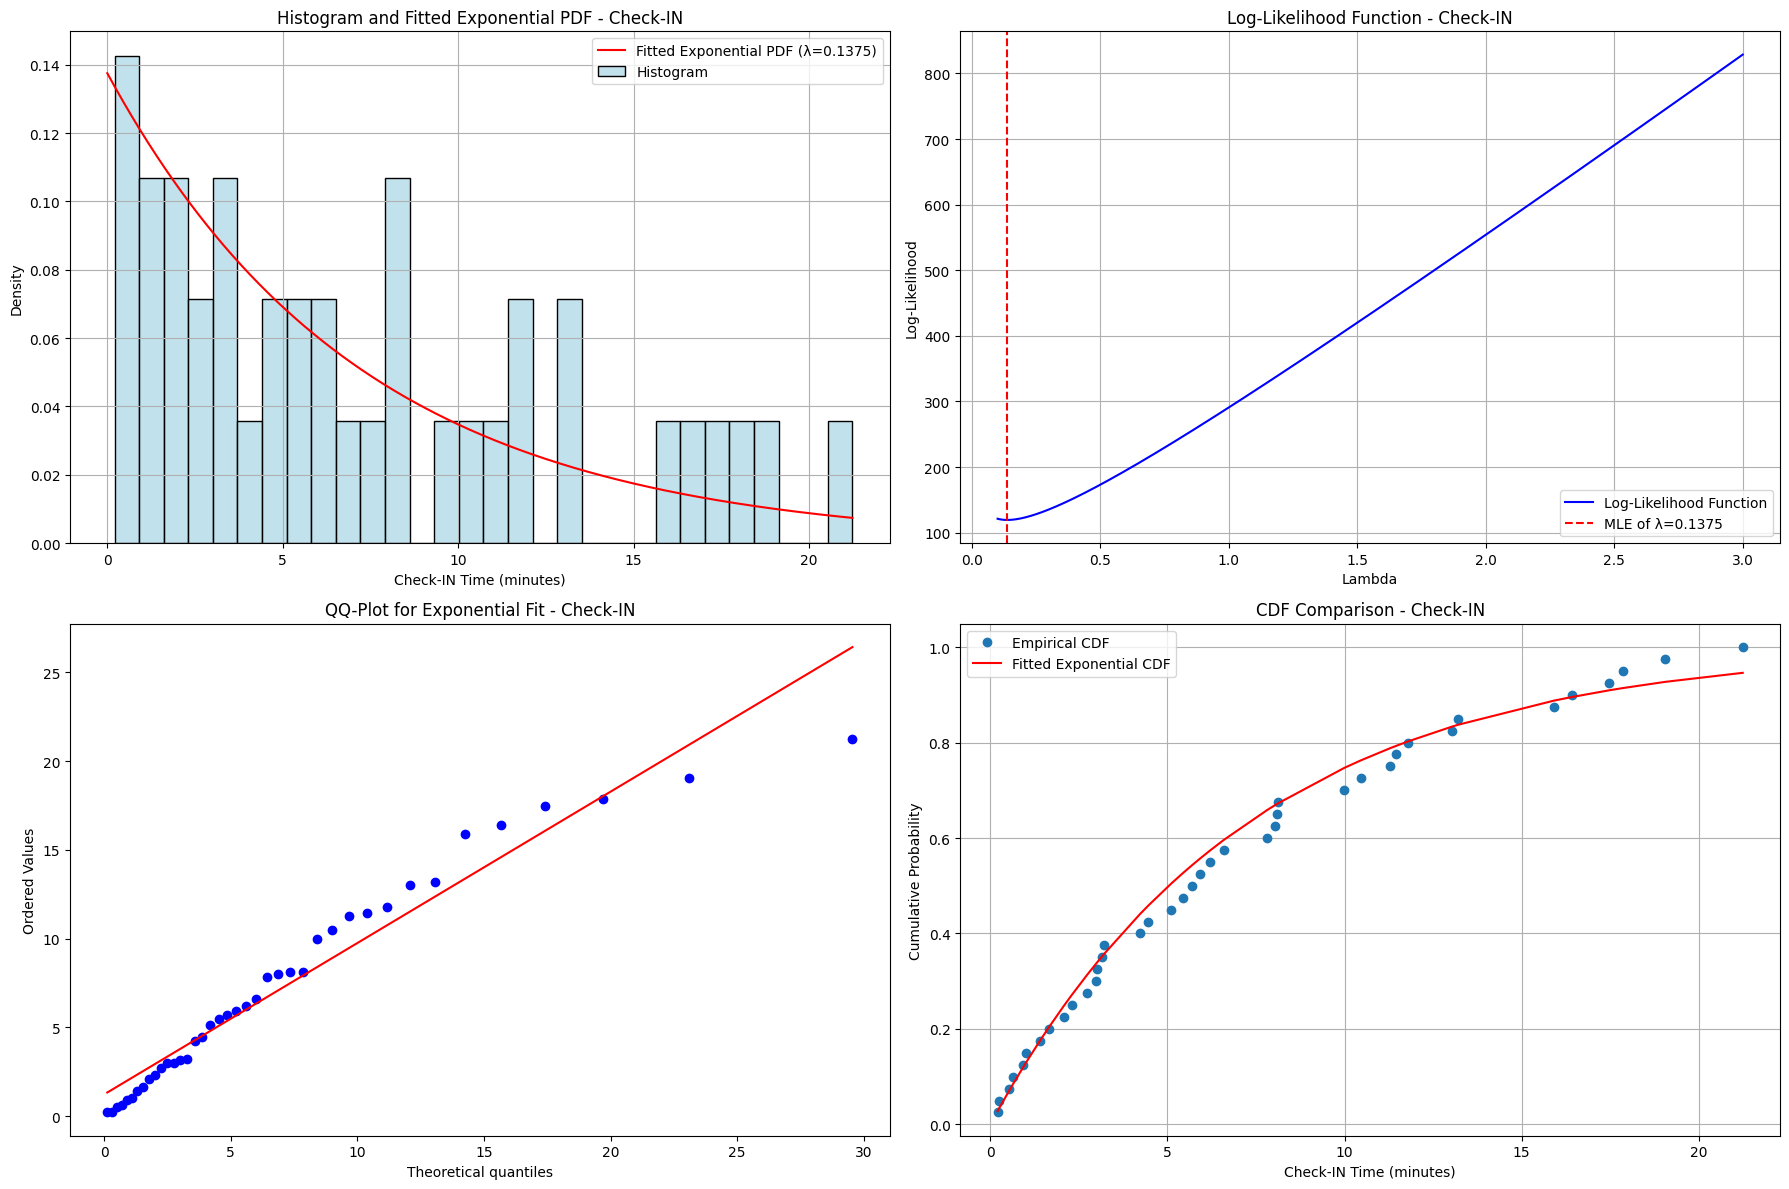

KS Test Statistic for Check-IN: 0.0834
KS Test P-Value for Check-IN: 0.9221
✅ No evidence to reject the null hypothesis - the data for Check-IN may fit an exponential distribution.


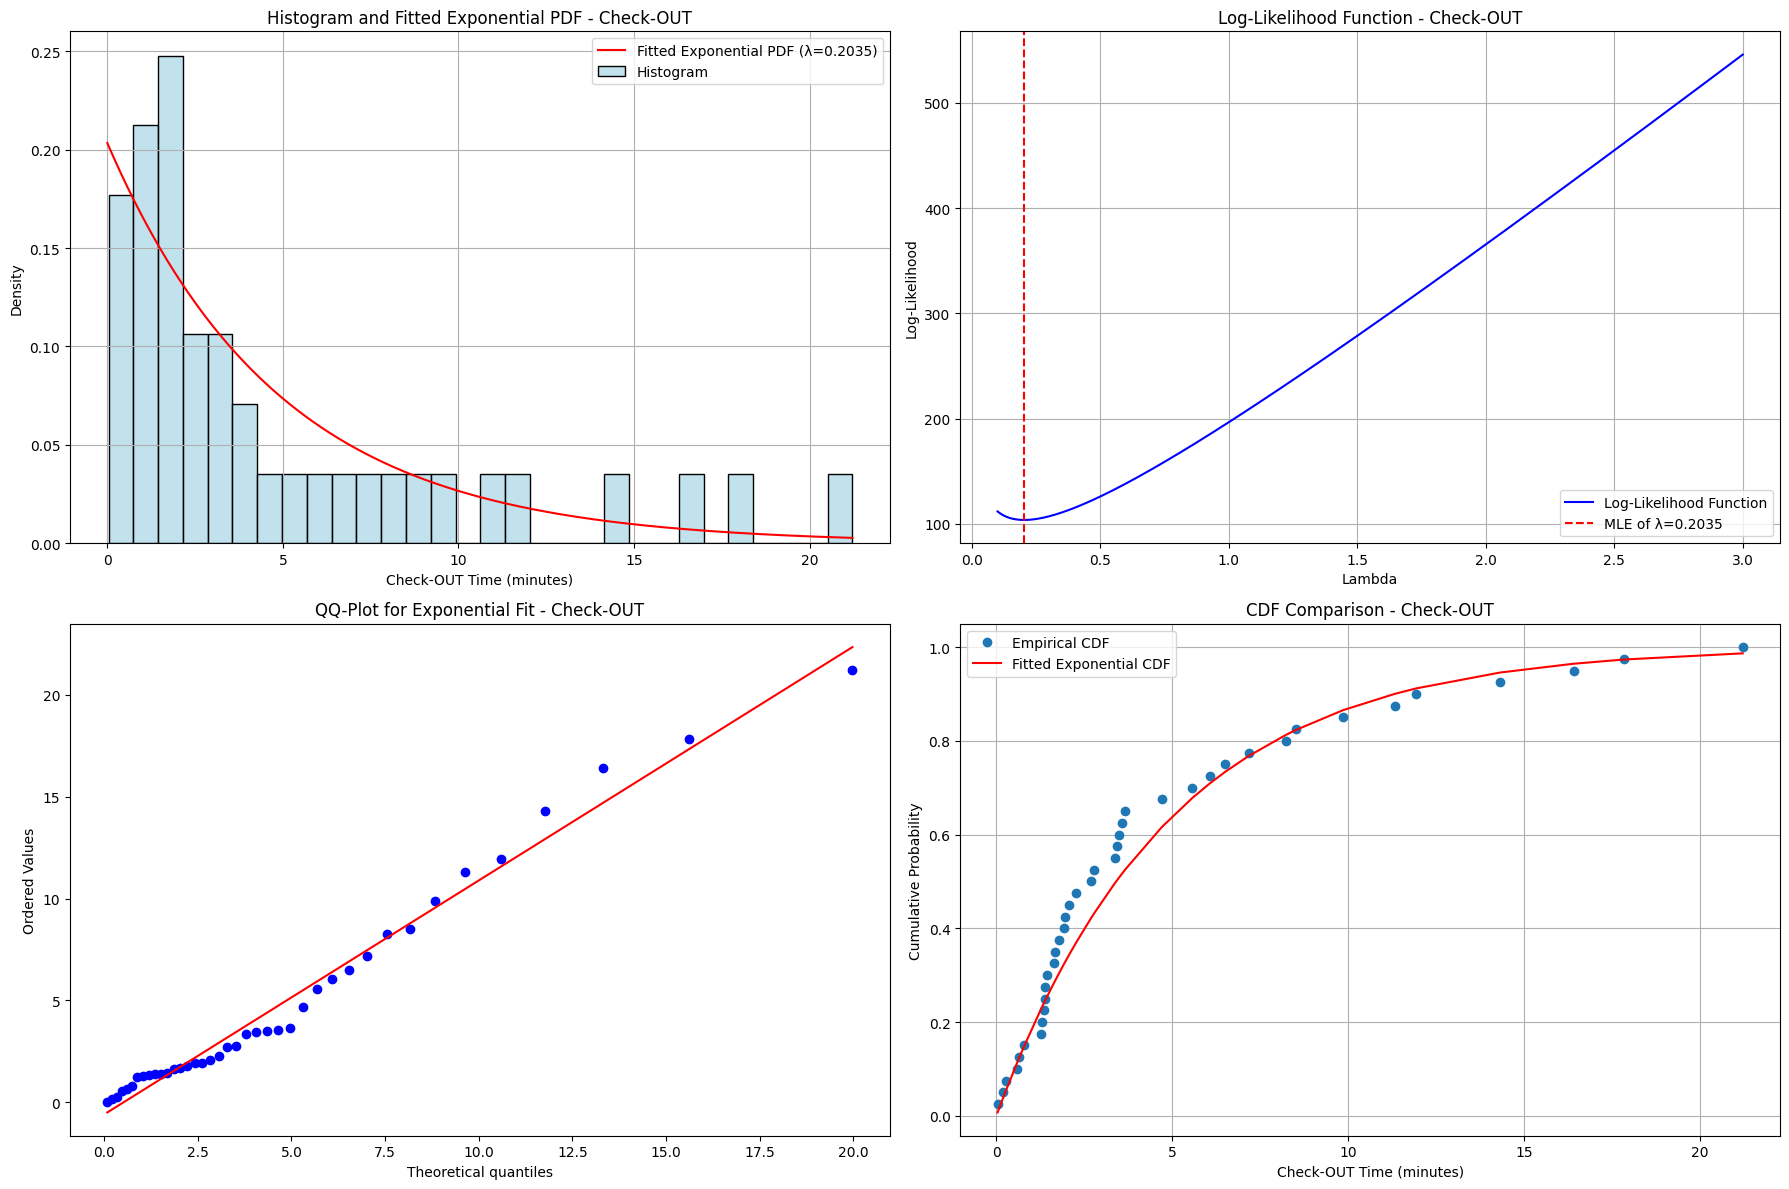

KS Test Statistic for Check-OUT: 0.1251
KS Test P-Value for Check-OUT: 0.5177
✅ No evidence to reject the null hypothesis - the data for Check-OUT may fit an exponential distribution.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, probplot, kstest
from google.colab import files

# Upload the file to Colab
uploaded = files.upload()  # You will be prompted to upload your file

# Read the uploaded file
file_path = "Check_INOUT_Samples_Minutes.xlsx"  # Name of the uploaded file
sheet_name = "Sheet1"  # Update the sheet name if necessary
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display column names in the dataset
print("Columns in the file:")
print(df.columns)

# Check if CheckIN and CheckOut columns exist
checkin_column = "CheckIN"
checkout_column = "CheckOut"

if checkin_column not in df.columns:
    raise KeyError(f"The column '{checkin_column}' was not found in the file. Please update the column name.")
if checkout_column not in df.columns:
    raise KeyError(f"The column '{checkout_column}' was not found in the file. Please update the column name.")

# Function to analyze a column
def analyze_column(column_name, label):
    # Extract data and drop missing values
    data = df[column_name].dropna().values

    # Calculate Maximum Likelihood Estimation (MLE) for λ parameter
    lambda_mle = 1 / np.mean(data)  # λ = 1 / mean of the data

    # Create values for the theoretical distribution
    x_values = np.linspace(0, np.max(data), 1000)
    pdf_fitted = lambda_mle * np.exp(-lambda_mle * x_values)

    # Generate plots
    plt.figure(figsize=(18, 12))

    # Histogram with PDF
    plt.subplot(2, 2, 1)
    sns.histplot(data, bins=30, kde=False, stat="density", color="lightblue", label="Histogram")
    plt.plot(x_values, pdf_fitted, 'r-', label=f'Fitted Exponential PDF (λ={lambda_mle:.4f})')
    plt.title(f"Histogram and Fitted Exponential PDF - {label}")
    plt.xlabel(f"{label} Time (minutes)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()

    # Log-Likelihood Function
    lambdas = np.linspace(0.1, 3, 1000)
    log_likelihoods = [(-len(data) * np.log(l) + l * np.sum(data)) for l in lambdas]

    plt.subplot(2, 2, 2)
    plt.plot(lambdas, log_likelihoods, 'b-', label="Log-Likelihood Function")
    plt.axvline(lambda_mle, color='r', linestyle='--', label=f'MLE of λ={lambda_mle:.4f}')
    plt.title(f"Log-Likelihood Function - {label}")
    plt.xlabel("Lambda")
    plt.ylabel("Log-Likelihood")
    plt.legend()
    plt.grid()

    # QQ-Plot to check fit
    plt.subplot(2, 2, 3)
    probplot(data, dist="expon", sparams=(0, 1 / lambda_mle), plot=plt)
    plt.title(f"QQ-Plot for Exponential Fit - {label}")

    # CDF Comparison
    plt.subplot(2, 2, 4)
    sorted_data = np.sort(data)
    cdf_fitted = 1 - np.exp(-lambda_mle * sorted_data)
    plt.plot(sorted_data, np.arange(1, len(data) + 1) / len(data), marker='o', linestyle='', label="Empirical CDF")
    plt.plot(sorted_data, cdf_fitted, 'r-', label="Fitted Exponential CDF")
    plt.title(f"CDF Comparison - {label}")
    plt.xlabel(f"{label} Time (minutes)")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

    # Kolmogorov-Smirnov (KS) test for goodness of fit
    ks_statistic, p_value_ks = kstest(data, 'expon', args=(0, 1 / lambda_mle))

    print(f"KS Test Statistic for {label}: {ks_statistic:.4f}")
    print(f"KS Test P-Value for {label}: {p_value_ks:.4f}")

    # Analyze KS test results
    if p_value_ks > 0.05:
        print(f"✅ No evidence to reject the null hypothesis - the data for {label} may fit an exponential distribution.")
    else:
        print(f"❌ The data for {label} does not fit an exponential distribution (reject H0).")

# Analyze CheckIN
analyze_column(checkin_column, "Check-IN")

# Analyze CheckOut
analyze_column(checkout_column, "Check-OUT")


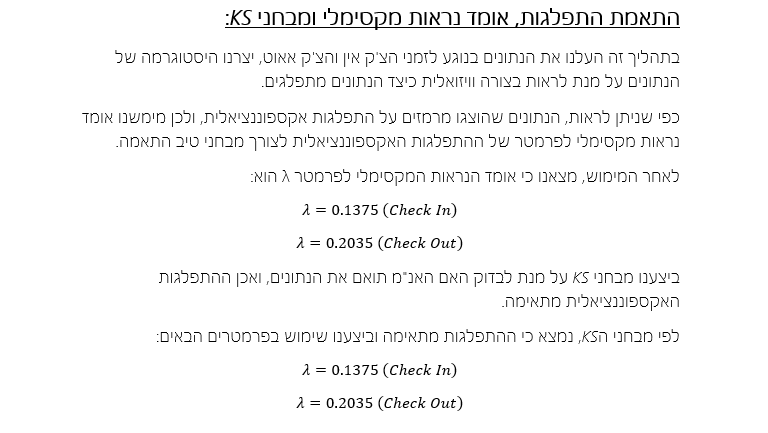



# אלגוריתמי דגימה
## זמן שהיה בבריכה וזמן שהיה בספא

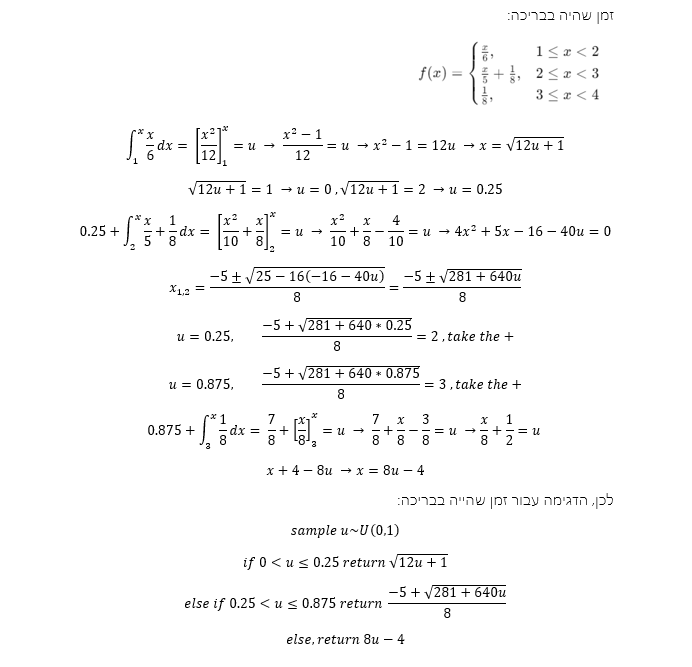

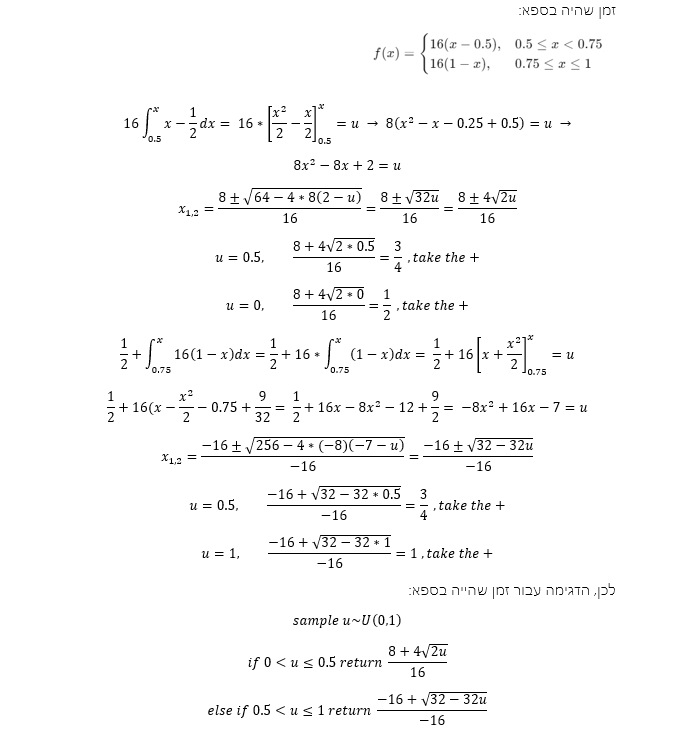

# מימוש אלגוריתמי דגימה

In [ ]:
import random
import math

#-------------------- Samples --------------------
def normalStandard_distribution():
    u1 = random.random()
    u2 = random.random()
    z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    return z


def normal_distribution(mean, std_dev):
    """
    Generate a random number from a normal distribution, with given mean and standard deviation
    """
    y = normalStandard_distribution()
    z = y*std_dev + mean
    return z

def exponential_distribution(lamda):
    """
    Generate a random number from an exponential distribution, with given lambda
    """
    u = random.random()
    return -1*(math.log(1 - u) / lamda)




# customers time and type of arrival
def guestGroupType():
    u1 = random.random()
    # customer Type
    if u1 <= 0.4: #Family
        u2 = random.random()
        if u2 <= 0.2: # 4 people family
            return "Family",4
        elif u2 <= 0.7: # 5 people family
            return "Family",5
        else:  # 3 people family
            return "Family",3
    elif u1 <= 0.8: #Couple
        return "Couple",2
    else: #Individual
        return "Single",1

# 10% of eligble guests desire a suite
def suitePref():
    u = random.random()
    if u <= 0.1:
        return True
    else:
        return False

# Stay duration at hotel
def nightsAtHotel():
    U1 = random.random()
    if U1 < 0.25: # 25% stay 1 night
        stay_duration = 1
    elif U1 < 0.25 + 0.46: # 46% stay 2 nights
        stay_duration = 2
    elif U1 < 0.25 + 0.46 + 0.2: # 20% stay 3 nights
        stay_duration = 3
    elif U1 < 0.25 + 0.46 + 0.2 + 0.05: # 5% stay 4 nights
        stay_duration = 4
    else: # 4% stay 5 nights
        stay_duration = 5
    return stay_duration

# Time spent at Pool, calculation above
def poolTime(): #Density function divided into domains
    u = random.random()
    if 0 <= u < 0.25:
        return (math.sqrt(12*u+1))*60
    if 0.25 <= u < 0.875:
        return ((-5+ math.sqrt(281+640*u))/8)*60
    if u >= 0.875:
        return (8*u-4)*60

# Spa service time, calculation above
def spaServiceTime(): #Density function divided into domains
    u = random.random()
    if 0 <= u < 0.5:
        return ((8+4* math.sqrt(2*u))/16)*60
    if 0.5 <= u :
        return ((-16+ math.sqrt(32-32*u))/(-16))*60


# Rate of arrival of customers to breakfast
def arriveBreakfast(): # Exponential distribution with lambda = 1/4
    return exponential_distribution(1/4)

# Breakfast service time
def breakfastServiceTime():
    return normal_distribution(40, 10)

# Bar service time
def barServiceTime():
    return normal_distribution(simulation.barServiceAvg, math.sqrt(simulation.barServiceDiff))

# check in service time, according to calculation above
def checkInTime():
    return exponential_distribution(0.1375)

# check out service time, according to calculation above
def checkOutTime():
    return exponential_distribution(0.2035)

# guest choice of item in the bar
def barChoice(guest):
    category = random.choice(["Food", "Drinks"])
    if guest.group.groupType == "Family":
        if category == "Drinks":
            drink = random.choice(["Coffee", "Juice"])
            return drink
        else: # category is food
            food = random.choice(["Toast", "Salad", "IceCream", "ShnitzelAndFries"])
            return food
    elif guest.group.groupType == "Single":
        if category == "Drinks":
            drink = random.choice(["Coffee", "Juice", "Beer", "Cocktail", "Wine"])
            return drink
        else: #category is food
            food = random.choice(["Toast", "Salad", "IceCream", "ShnitzelAndFries"])
            return food

# price of item in bar, according to choice
def barPrice(item):
    price = 0
    if item in ("Coffee", "Juice", "Beer", "IceCream"):
        price =  3
    elif item in ("Wine", "Toast"):
        price =10
    elif item in ("Cocktail","ShnitzelAndFries"):
        price = 15
    elif item == "Salad":
        price =12
    return price

# arrival rate, affected by rooms available and hotel rating
def arrivalTime(simulation):
    simulation.update_available_rooms()
    if simulation.R_available > 0:
        lamda = 20 * ((simulation.R_available / 110) ** 1.5) * ((simulation.H / 10) ** 2)
        return exponential_distribution(lamda)
    else:
        return 1999999999999999

# family starts at pool or bar
def chooseBarOrPoolFamily():
    u = random.random()
    if u <= 0.8:
        return "Pool"
    else:
        return "Bar"

# couple go together to the pool or seperatly
def togetherOrSeparatePool():
    u = random.random()
    if u <= 0.7:
        return "Together"
    else:
        return "Separate"

# guests don't like food in breakfast
def badFood():
    u = random.random()
    if u <= 0.1:
        return True
    else:
        return False

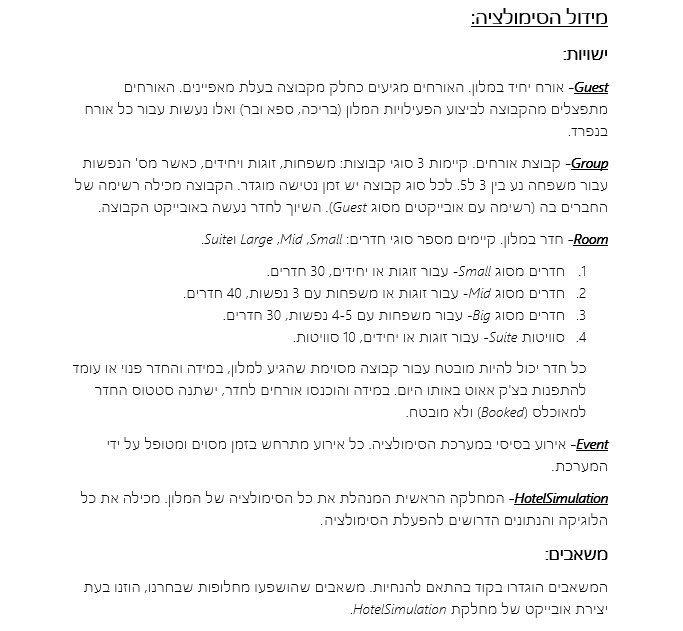

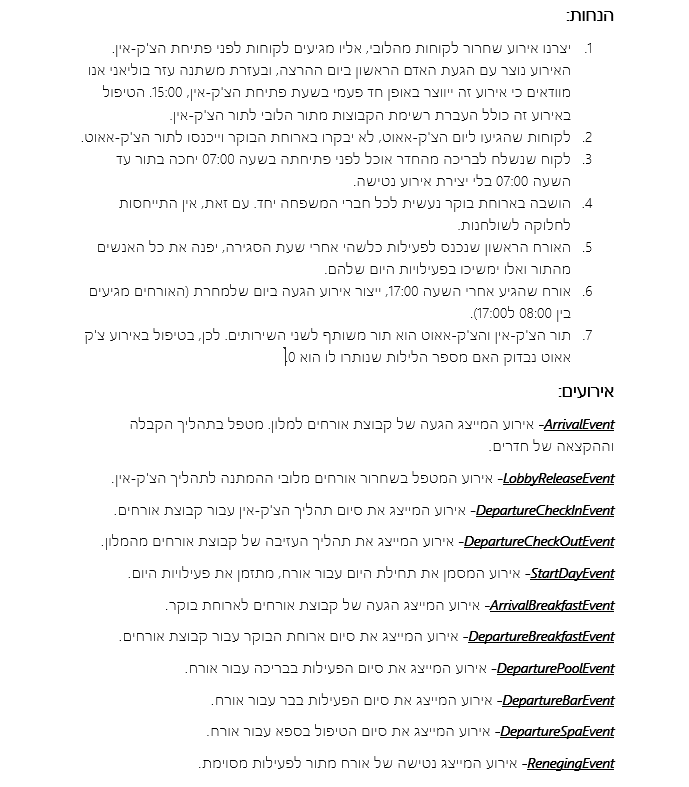

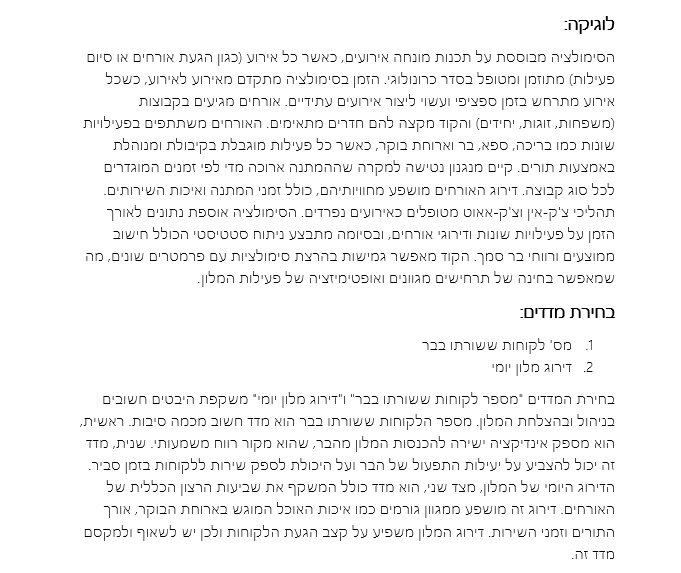

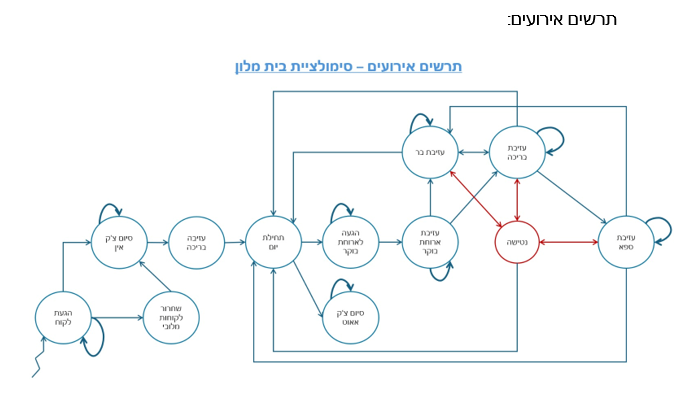

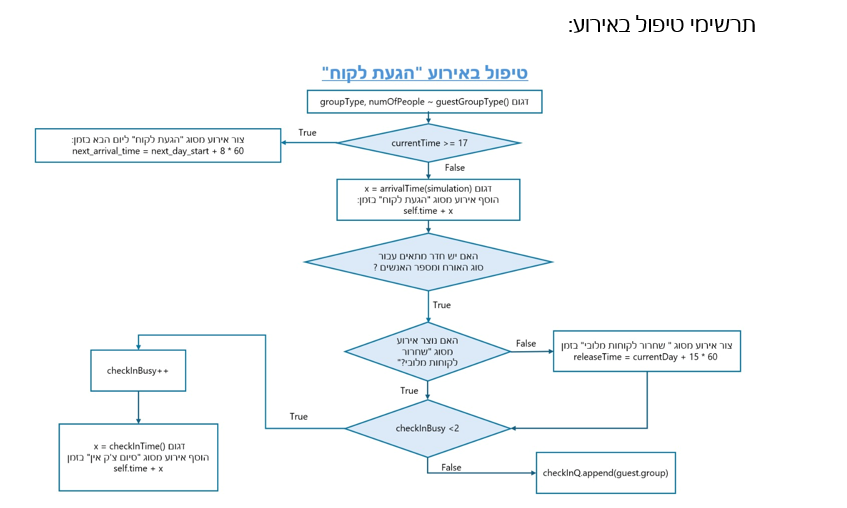

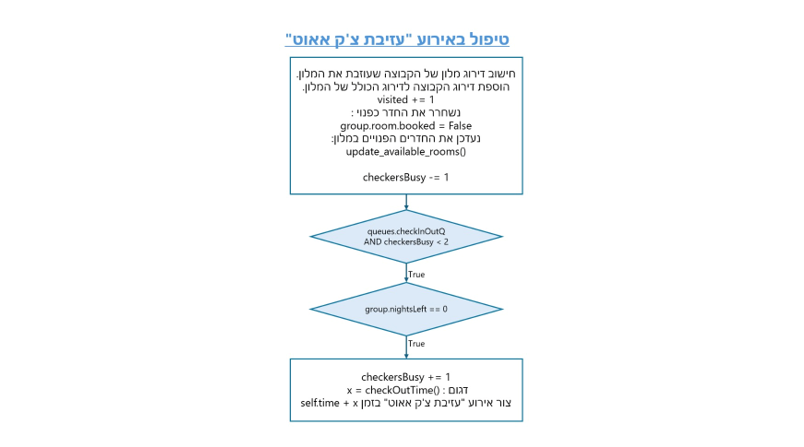


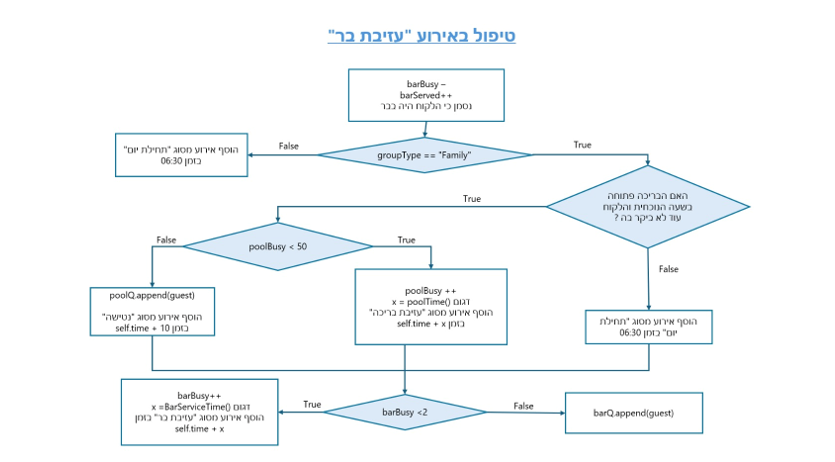

In [ ]:
def timeOclock(clock): #converts simulation clock to real time
    return (clock % (24*60))/60

def breakfastOclock(clock): #converts simulation clock to breakfast time
    return ((clock//1440)  + 1)*1440 +6.5*60

def breakfastOclockAfterMidnight(clock): #converts simulation clock to breakfast time
    return (clock//1440)*1440 +6.5*60

def resetActivities(self):
    for activity in self.activities:
        self.activities[activity] = False

def familyDay(simulation, group, currentTime, time):
    for guest in group.members:
        activity = chooseBarOrPoolFamily()
        if activity == "Pool":
            handlePoolActivityFam(simulation, guest, group, currentTime, time)
        elif activity == "Bar":
            handleBarActivity(simulation, guest, time)
    group.firstStartDay = True

def handlePoolActivityFam(simulation, guest, group, currentTime, time):
    if currentTime < 7:
        simulation.queues.poolQ.append(guest)
    elif 7 <= currentTime < 19:
        if simulation.occupancy.poolBusy < simulation.poolSlots:
            simulation.occupancy.poolBusy += 1
            x = poolTime()
            simulation.schedule_event(DeparturePoolEvent(time + x, guest))
        else:
            simulation.queues.poolQ.append(guest)
            y = group.reneging
            simulation.schedule_event(RenegingEvent(time + y, guest, "Pool", time//1440))
    else:  # pool is closed, go to bar
        guest.activities["Pool"] = True
        handleBarActivity(simulation, guest, time)

def handleBarActivity(simulation, guest, time):
    if simulation.occupancy.barBusy < simulation.barSlots:
        guest.activities["Bar"] = True
        simulation.occupancy.barBusy += 1
        x = barServiceTime()
        simulation.schedule_event(DepartureBarEvent(time + x, guest, time//1440))
    else:
        simulation.queues.barQ.append(guest)
        y = guest.group.reneging
        simulation.schedule_event(RenegingEvent(time + y, guest, "Bar", time//1440))

def couplesDay(simulation, group, currentTime, time):
    # Pool activity
    poolChoice = togetherOrSeparatePool()
    if poolChoice == "Together":
        for guest in group.members:
            handlePoolActivityCoupleSingle(simulation, guest,currentTime, time)
        group.firstStartDay = True
    else:
        # Only one member goes to the pool
        guest = random.choice(group.members)
        handlePoolActivityCoupleSingle(simulation, guest, currentTime, time)
        group.firstStartDay = True

def handlePoolActivityCoupleSingle(simulation, guest, currentTime, time):
    if currentTime < 7:
        simulation.queues.poolQ.append(guest)
    elif 7 <= currentTime < 19:
        if simulation.occupancy.poolBusy < simulation.poolSlots:
            simulation.occupancy.poolBusy += 1
            x = poolTime()
            simulation.schedule_event(DeparturePoolEvent(time + x, guest))
        else:
            simulation.queues.poolQ.append(guest)
            y = guest.group.reneging
            simulation.schedule_event(RenegingEvent(time + y, guest, "Pool", time//1440))
    else:  # pool and spa are closed
        if guest.group.groupType == "Couple":
            simulation.schedule_event(StartDayEvent(breakfastOclock(time), guest))
        else: #single
            guest.activities["Pool"] = True
            guest.activities["Spa"] = True
            if simulation.occupancy.barBusy < simulation.barSlots:
                guest.activities["Bar"] = True
                simulation.occupancy.barBusy += 1
                x = barServiceTime()
                simulation.schedule_event(DepartureBarEvent(time + x, guest, time//1440))
            else:
                simulation.queues.barQ.append(guest)
                y = guest.group.reneging
                simulation.schedule_event(RenegingEvent(time + y, guest, "Bar", time//1440))

def singlesDay(simulation, group, currentTime, time):
    guest = group.members[0]
    group.firstStartDay = True
    handlePoolActivityCoupleSingle(simulation, guest, currentTime, time)

def createGuestGroup(groupType, numOfPeople, suite):
    """
    Creates a new guest group and sets their attributes.
    """
    group = GuestGroup(groupType, numOfPeople, suite)
    for i in range(numOfPeople):
        guest = Guest(group)
        group.addMember(guest)
    group.setNights(nightsAtHotel())  # Randomly decide how many nights the group will stay
    return group







class Guest:
    def __init__(self, group):
        self.group = group
        self.activities = {}
        self.setActivities()
        self.rating = 10

    def setActivities(self):
        if self.group.groupType == "Family":
            self.activities = {
                "Pool": False,
                "Bar": False
            }
        elif self.group.groupType == "Couple":
            self.activities = {
                "Pool": False,
                "Spa": False
            }
        else:  # Single
            self.activities = {
                "Pool": False,
                "Spa": False,
                "Bar": False
            }


class GuestGroup:
    def __init__(self, groupType, numOfPeople, suiteBool):
        self.groupType = groupType # "Family", "Couple", "Single"
        self.numOfPeople = numOfPeople
        self.nightsLeft = 0 # Number of nights left at the hotel
        self.checkInDay = True
        self.suite = suiteBool
        self.room = None
        self.reneging = 0
        self.members = []  # List of individual Guests objects
        self.firstStartDay = True
        self.queueEntryTime = None # minutes in simulation
        self.setFields()

    def setFields(self):
        if self.groupType == "Family":
            self.reneging = 10
        elif self.groupType == "Couple":
            self.reneging = 15
        else:  # Single
            self.reneging = 20

    def setRoom(self, room):
        self.room = room

    def addMember(self, guest):
        self.members.append(guest)

    def setNights(self, nights):
        self.nightsLeft = nights


class Room:
    def __init__(self, room_number, room_type, price_per_night): #Constructor
      self.room_number = room_number
      self.room_type = room_type #small, mid, big, suite
      self.price_per_night = price_per_night
      self.booked = False # True: booked, False: available
      self.promised = None






class Event:
    def __init__(self, time):
        self.time = time

    def __lt__(self, other):
        return self.time < other.time

    def handle(self, simulation):
        raise NotImplementedError("Handle method must be implemented by subclasses")


class ArrivalEvent(Event):  # Arrival of guests to the hotel
    def handle(self, simulation):
        currentTime = timeOclock(self.time)

        # Handle current guest arrival
        groupType, numOfPeople = guestGroupType()
        self.handleGroupArrival(simulation, groupType, numOfPeople)

        # Schedule the next arrival
        self.scheduleNextArrival(simulation, currentTime)

    def addGroupToQueuesAfterArrival(self, simulation, group):
        """
        Adds the guest group to the appropriate queue based on the time of arrival.
        """
        currentTime = timeOclock(self.time)

        if currentTime < 15:
            currentDay = (self.time // 1440) * 1440  # Start of this day (midnight)
            releaseTime = currentDay + 15 * 60  # Add 15 hours for 15:00 PM
            # Add to lobby queue
            group.queueEntryTime = releaseTime
            simulation.queues.lobbyQ.append(group)
            if not simulation.createdLobbyRelease:
                simulation.schedule_event(LobbyReleaseEvent(releaseTime))
                simulation.createdLobbyRelease = True

        else:
           # Add to check in queue or process check-in immediately
            if simulation.occupancy.checkersBusy < 2:  # Checkers are available
                simulation.occupancy.checkersBusy += 1
                x = checkInTime()
                simulation.schedule_event(DepartureCheckInEvent(self.time + x, group))
            else:
                group.queueEntryTime = self.time
                simulation.queues.checkInOutQ.append(group)

    def checkAvailability(self,groupType, numOfPeople):
        """
            checks for available rooms (not suites) for the group.
        """
        for room in simulation.rooms:
            if groupType == "Family":
                if numOfPeople == 5 or numOfPeople == 4:
                    if room.room_type == "big" and room.booked == False and room.promised is None:
                        return True, room
                else:  # family of 3
                    if room.room_type == "mid" and room.booked == False and room.promised is None:
                        return True, room

            elif groupType == "Couple":
                if room.room_type == "small" and room.booked == False and room.promised is None:
                    return True, room
                elif room.room_type == "mid" and room.booked == False and room.promised is None:
                    return True, room

            else: #single
                if room.room_type == "small" and room.booked == False and room.promised is None:
                    return True, room
        return False, None

    def futureCheckOutRooms(self, groupType, numOfPeople):
        """
            checks for rooms (not suites) that are to be released in check out.
        """
        for group in simulation.groupGuests:
            if group.nightsLeft == 0:
                roomType = group.room.room_type
                if groupType == "Family" and numOfPeople in [4, 5]:
                    if roomType == "big":
                        return True, group.room
                elif groupType == "Family" and numOfPeople == 3:
                    if roomType == "mid":
                        return True, group.room
                elif groupType == "Couple":
                    if roomType in ["small", "mid"]:
                        return True, group.room
                elif groupType == "Single":
                    if roomType == "small":
                        return True, group.room
        return False, None

    def checkSuiteAvailability(self):
        """
            checks for available suites (not rooms) for the couple/single.
        """
        for room in simulation.rooms:
            if room.room_type == "suite" and room.booked == False and room.promised is None:
                return True, room
        return False, None

    def futureCheckOutSuite(self):  # ONLY SUITE
        """
            checks for suites (not rooms) that are to be released in check out.
        """
        for group in simulation.groupGuests:
            if group.nightsLeft == 0:
                if group.room.room_type == "Suite":
                    return True, group.room
        return False, None

    def availableRoomNow(self,groupType, numOfPeople):
        result = self.checkAvailability(groupType, numOfPeople)
        result2 = self.futureCheckOutRooms(groupType, numOfPeople)
        if result[0]:
            return result
        elif result2[0]:
            return result2
        else:
            return False, None

    def availableSuiteNow(self):
        result = self. futureCheckOutSuite()
        result2 = self.checkSuiteAvailability()
        if result[0]:
            return result
        elif result2[0]:
            return result
        else:
            return False, None

    def handleGroupArrival(self, simulation, groupType, numOfPeople):
        if groupType == "Family":
            return self.handleFamilyArrival(simulation, groupType, numOfPeople)
        else:  # Couple or Single
            return self.handleCoupleOrSingleArrival(simulation, groupType, numOfPeople)

    def handleFamilyArrival(self, simulation, groupType, numOfPeople):
        suite = False  # Families cannot stay in suites
        availability = self.availableRoomNow(groupType, numOfPeople)
        if availability[0]:  # Room is available
            group = createGuestGroup(groupType, numOfPeople, suite)
            availability[1].promised = group
            self.addGroupToQueuesAfterArrival(simulation, group)
            return True
        return False

    def handleCoupleOrSingleArrival(self, simulation, groupType, numOfPeople):
        suite = suitePref()
        if suite:
            suiteAvailability = self.availableSuiteNow()
            if suiteAvailability[0]:  # Suite is available
                group = createGuestGroup(groupType, numOfPeople, suite)
                suiteAvailability[1].promised = group
                self.addGroupToQueuesAfterArrival(simulation, group)
                return True

        # Doesn't want a suite or no suite is available
        availability = self.availableRoomNow(groupType, numOfPeople)
        if availability[0]:
            group = createGuestGroup(groupType, numOfPeople, False)
            availability[1].promised = group
            self.addGroupToQueuesAfterArrival(simulation, group)
            return True
        return False

    def scheduleNextArrival(self, simulation, currentTime):
        # Case 1: After or at 5 PM (17:00), schedule next day arrivals
        if currentTime >= 17:
            self.scheduleNextDayArrival(simulation)
            return

        # Between 8 AM and 5 PM (time for arrivals)
        elif 8 <= currentTime < 17:
            if self.areRoomsAvailable(simulation):
                x = arrivalTime(simulation)  # Get the inter-arrival time based on arrival rate
                next_arrival_time = self.time + x
                if next_arrival_time < simulation.simulation_time:
                    if timeOclock(next_arrival_time) < 17:
                        simulation.schedule_event(ArrivalEvent(next_arrival_time))
                    else:
                        # If next arrival would be after 17:00, schedule for next day instead
                        self.scheduleNextDayArrival(simulation)
                else:
                    # If next arrival is beyond simulation time, don't schedule
                    print("Next arrival would be beyond simulation time; not scheduling.")
            else:
                print("No rooms available; scheduling for next day.")
                self.scheduleNextDayArrival(simulation)

    def scheduleNextDayArrival(self, simulation):
        next_day_start = (self.time // 1440 + 1) * 1440  # Start of the next day (midnight)
        next_arrival_time = next_day_start + 8 * 60  # Add 8 hours for 8:00 AM
        if next_arrival_time < simulation.simulation_time:  # Check if within bounds
            simulation.schedule_event(ArrivalEvent(next_arrival_time))  # Schedule at 8:00 AM
        else:
            return

    def areRoomsAvailable(self, simulation):
        for room in simulation.rooms:
            if not room.booked and room.promised is None:
                return True
        return False

class LobbyReleaseEvent(Event):
    def handle(self, simulation):
        simulation.createdLobbyRelease = False
        if simulation.queues.lobbyQ:
            group = simulation.queues.lobbyQ.pop(0)
            if simulation.occupancy.checkersBusy < 2:  # Checkers are available
                simulation.occupancy.checkersBusy += 1
                x = checkInTime()
                simulation.schedule_event(DepartureCheckInEvent(self.time + x, group))
            else:
                simulation.queues.checkInOutQ.append(group)
            if simulation.queues.lobbyQ:
                simulation.queues.checkInOutQ.extend(simulation.queues.lobbyQ)
                simulation.queues.lobbyQ.clear()

class DepartureCheckInEvent(Event):
    def __init__(self, time, group):
        super().__init__(time)
        self.group = group

    def handle(self, simulation): # Complete check-in process for the group
        currentTime = timeOclock(self.time)

        self.applyQueuePenalty(simulation)

        # Assign room and complete check-in
        if 15<=currentTime<=20 :
            self.assignRoom()
            self.schedulePoolActivity(simulation, currentTime)
        else:
            self.resetPromisedRooms(simulation)

        # Handle checkers and queue
        self.handleCheckersAndQueue(simulation)

    def assignRoom(self):
        for room in simulation.rooms:
            if room.promised == self.group and not room.booked:
                room.booked = True
                room.promised = None
                self.group.setRoom(room)
                simulation.groupGuests.append(self.group)
                return True
        return False

    def applyQueuePenalty(self, simulation):
        if self.group.queueEntryTime is not None:
            timeInQueue = self.time - self.group.queueEntryTime
            penaltyIntervals = timeInQueue // 20
            penalty = penaltyIntervals * 0.03

            for guest in self.group.members:
                guest.rating = max(0, guest.rating - penalty)
            self.group.queueEntryTime = None

    def resetPromisedRooms(self, simulation):
        for room in simulation.rooms:
            room.promised = None
        simulation.update_available_rooms()
        simulation.queues.checkInOutQ.clear()

    def handleCheckersAndQueue(self, simulation):
        simulation.occupancy.checkersBusy -= 1

        # Check if there are waiting groups and available checkers
        while simulation.queues.checkInOutQ and simulation.occupancy.checkersBusy < 2:
            next_group = simulation.queues.checkInOutQ.pop(0)
            simulation.occupancy.checkersBusy += 1
            x = checkInTime()
            simulation.schedule_event(DepartureCheckInEvent(self.time + x, next_group))

    def schedulePoolActivity(self, simulation, currentTime):
        if currentTime < 19:  # Pool is open
            for guest in self.group.members:
                if simulation.occupancy.poolBusy < simulation.poolSlots:
                    simulation.occupancy.poolBusy += 1
                    x = poolTime()
                    simulation.schedule_event(DeparturePoolEvent(self.time + x, guest))
                else:
                    simulation.queues.poolQ.append(guest)
                    y = self.group.reneging
                    simulation.schedule_event(RenegingEvent(self.time + y, guest, "Pool", self.time // 1440))
        elif currentTime >= 19 : #pool is closed
            for guest in self.group.members:
                simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), guest))

class DepartureCheckOutEvent(Event):
    def __init__(self, time, group):
        super().__init__(time)
        self.group = group

    def handle(self, simulation):
        if self.group not in simulation.groupGuests:
            return  # Exit early if the group is not in the guest list
        sumOfRatings = 0
        for guest in self.group.members:
            sumOfRatings += guest.rating
            simulation.current_day_checkout_ratings.append(guest.rating)
        averageGroupRating = sumOfRatings/self.group.numOfPeople
        simulation.visited += 1
        simulation.H = (simulation.H*(simulation.visited-1) + averageGroupRating) / simulation.visited
        self.group.room.booked = False
        simulation.update_available_rooms()
        simulation.groupGuests.remove(self.group)

        self.handleCheckersAndQueueCheckOut(simulation)

    def handleCheckersAndQueueCheckOut(self, simulation):
        simulation.occupancy.checkersBusy -= 1

        # Check if there are waiting groups and available checkers
        while simulation.queues.checkInOutQ and simulation.occupancy.checkersBusy < 2:
            for group in simulation.queues.checkInOutQ:
                if group.nightsLeft == 0:
                    simulation.queues.checkInOutQ.remove(group)
                    simulation.occupancy.checkersBusy += 1
                    x = checkOutTime()
                    simulation.schedule_event(DepartureCheckOutEvent(self.time + x, group))


class StartDayEvent(Event):
    def __init__(self, time, guest):
        super().__init__(time)
        self.guest = guest

    def handle(self, simulation):
        self.guest.group.checkInDay = False
        resetActivities(self.guest) #reset guests activities for the day
        if self.guest.group.nightsLeft == 1 and self.guest.group.firstStartDay:
            self.guest.group.nightsLeft -= 1
            self.guest.group.firstStartDay = False
            if simulation.occupancy.checkersBusy < 2:  # available checker
                simulation.occupancy.checkersBusy += 1
                y = checkOutTime()
                simulation.schedule_event(DepartureCheckOutEvent(self.time + y, self.guest.group))
            else:
                simulation.queues.checkInOutQ.append(self.guest.group)
        elif self.guest.group.nightsLeft > 1 and self.guest.group.firstStartDay: #one of the group members finished the day, equals true
            self.guest.group.nightsLeft -= 1
            self.guest.group.firstStartDay = False
            x = arriveBreakfast()
            currentTime = timeOclock(self.time)
            checkTime = timeOclock(self.time + x)
            if 6.5 < checkTime < 11.5: #all guests that can go to breakfast
                simulation.schedule_event(ArrivalBreakfastEvent(self.time + x, self.guest.group))
            else: #missed breakfast
                if self.guest.group.groupType== "Family":
                    familyDay(simulation, self.guest.group, currentTime, self.time)
                elif self.guest.group.groupType== "Couple":
                    couplesDay(simulation, self.guest.group, currentTime, self.time)
                elif self.guest.group.groupType== "Single":
                    singlesDay(simulation, self.guest.group, currentTime,self.time)


class ArrivalBreakfastEvent(Event):
    def __init__(self, time, group):
        super().__init__(time)
        self.group = group

    def handle(self, simulation):
        x = breakfastServiceTime()
        currentTime = timeOclock(self.time)
        checkTime = timeOclock(self.time + x)
        if checkTime <=11.5:
            if simulation.occupancy.breakfastBusy <= simulation.breakfastSlots-self.group.numOfPeople:  # available seat in breakfast
                simulation.occupancy.breakfastBusy += self.group.numOfPeople
                simulation.schedule_event(DepartureBreakfastEvent(self.time + x, self.group))
            else:
                self.group.queueEntryTime = self.time
                simulation.queues.breakfastQ.append(self.group)
        else:
            self.continueDay(simulation, self.group, currentTime)

    def continueDay(self, simulation, group, currentTime):
        if group.groupType == "Family":
            familyDay(simulation, group, currentTime, self.time)
        elif group.groupType == "Couple":
            couplesDay(simulation, group, currentTime, self.time)
        elif group.groupType == "Single":
            singlesDay(simulation, group, currentTime, self.time)


class DepartureBreakfastEvent(Event):
    def __init__(self, time, group):
        super().__init__(time)
        self.group = group

    def handle(self, simulation):
        self.applyQueuePenalty(simulation)

        currentTime = timeOclock(self.time)
        for i in range(self.group.numOfPeople):
            badFoodQual = badFood()
            if badFoodQual:
                self.group.members[i].rating -= 0.025

        simulation.occupancy.breakfastBusy -= self.group.numOfPeople
        self.continueDay(simulation, self.group, currentTime)

        # Process breakfast queue
        self.processBreakfastQueue(simulation, currentTime)


    def applyQueuePenalty(self, simulation):
        if self.group.queueEntryTime is not None:
            timeInQueue = self.time - self.group.queueEntryTime
            penaltyIntervals = timeInQueue // 20
            penalty = penaltyIntervals * 0.02

            for guest in self.group.members:
                guest.rating = max(0, guest.rating - penalty)
            self.group.queueEntryTime = None

    def continueDay(self, simulation, group, currentTime):
        if group.groupType == "Family":
            familyDay(simulation, group, currentTime, self.time)
        elif group.groupType == "Couple":
            couplesDay(simulation, group, currentTime, self.time)
        elif group.groupType == "Single":
            singlesDay(simulation, group, currentTime, self.time)

    def processBreakfastQueue(self, simulation, currentTime):
        if currentTime >= 11.5:
            # Process checkouts for groups in breakfast queue
            for group in simulation.queues.breakfastQ[:]:
                self.continueDay(simulation, group, currentTime)

            # Clear the breakfast queue
            simulation.queues.breakfastQ.clear()
        else:
            # Try to accommodate waiting groups
            i = 0
            while i < len(simulation.queues.breakfastQ):
                group = simulation.queues.breakfastQ[i]
                if group.numOfPeople <= simulation.breakfastSlots - simulation.occupancy.breakfastBusy:
                    simulation.queues.breakfastQ.pop(i)
                    x = breakfastServiceTime()
                    simulation.occupancy.breakfastBusy += group.numOfPeople
                    simulation.schedule_event(DepartureBreakfastEvent(self.time + x, group))
                else:
                    i += 1

class DeparturePoolEvent(Event):
    def __init__(self, time, guest):
        super().__init__(time)
        self.guest = guest

    def handle(self, simulation):
        currentTime = timeOclock(self.time)
        simulation.occupancy.poolBusy -= 1
        if currentTime >=19: #pool is closed and guests still in queue
            for guest in simulation.queues.poolQ:
                if guest.group.checkInDay: #there isn't a place in the pool and the guests goes to sleep
                    simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), guest))
                elif guest.group.groupType == "Family": #regular day - what's the family do next
                    guest.activities["Pool"] = True
                    if not guest.activities["Bar"]: #family members that didn't go to the bar yet
                        handleBarActivity(simulation, guest, self.time)
                    else: #the guest was already in the bar and couldn't get to pool
                        simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), guest))
                elif guest.group.groupType == "Couple": #pool and spa close at 19
                    simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), guest))
                elif guest.group.groupType == "Single": #pool and spa close at 19, go to bar
                    handleBarActivity(simulation, guest, self.time)
            simulation.queues.poolQ.clear()
            if self.guest.group.checkInDay:
                simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
            else:
                self.guest.activities["Pool"] = True
                if self.guest.group.groupType == "Family":
                    if not self.guest.activities["Bar"]:#didnt go to the bar yet
                        handleBarActivity(simulation, self.guest, self.time)
                    else: #he went to bar and pool and end his day
                        simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
                elif self.guest.group.groupType == "Couple":
                        simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
                else: #single
                        handleBarActivity(simulation, self.guest, self.time)

        else: #pool is open
            if self.guest.group.checkInDay:
                simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
            else:
                self.guest.activities["Pool"] = True
                if self.guest.group.groupType == "Family":
                    if not self.guest.activities["Bar"]:#didnt go to the bar yet
                        handleBarActivity(simulation, self.guest, self.time)
                    else: #he went to bar and pool and end his day
                        simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
                elif self.guest.group.groupType == "Couple":
                    if simulation.occupancy.spaBusy < 30: #there's a place in the spa
                        simulation.occupancy.spaBusy += 1
                        x = spaServiceTime() #how long will his treatment take
                        simulation.schedule_event(DepartureSpaEvent(self.time + x, self.guest))
                    else: #the spa is fully booked
                        simulation.queues.spaQ.append(self.guest)
                        y = self.guest.group.reneging
                        simulation.schedule_event(RenegingEvent(self.time + y, self.guest, "Spa", self.time//1440))
                else: #single
                    if simulation.occupancy.spaBusy < 30:
                        simulation.occupancy.spaBusy += 1
                        x = spaServiceTime()
                        simulation.schedule_event(DepartureSpaEvent(self.time + x, self.guest))
                    else:
                        simulation.queues.spaQ.append(self.guest)
                        y = self.guest.group.reneging
                        simulation.schedule_event(RenegingEvent(self.time + y, self.guest, "Spa", self.time//1440))

            if simulation.queues.poolQ: #if there are guests in the pool queue
                next_guest = simulation.queues.poolQ.pop(0)
                simulation.occupancy.poolBusy += 1
                x = poolTime()
                simulation.schedule_event(DeparturePoolEvent(self.time + x, next_guest))

class DepartureBarEvent(Event):
    def __init__(self, time, guest, currentDay):
        super().__init__(time)
        self.guest = guest
        self.currentDay = currentDay
    def handle(self, simulation):
        currentTime = timeOclock(self.time)
        self.guest.activities["Bar"] = True
        simulation.metrics.barServed += 1
        if self.guest.group.groupType == "Family":
            if not self.guest.activities["Pool"]:
                if currentTime < 7:
                    simulation.queues.poolQ.append(self.guest)
                elif 7 <= currentTime < 19:
                    if simulation.occupancy.poolBusy < simulation.poolSlots:
                        simulation.occupancy.poolBusy += 1
                        x = poolTime()
                        simulation.schedule_event(DeparturePoolEvent(self.time + x, self.guest))
                    else:
                        simulation.queues.poolQ.append(self.guest)
                        y = self.guest.group.reneging
                        simulation.schedule_event(RenegingEvent(self.time + y, self.guest, "Pool", self.time//1440))
                else:  # pool is closed
                    simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
            else: #been to bar and pool
                checkDay = self.time // 1440
                if checkDay == self.currentDay: #check if we are in the same day or the next day
                    simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
                else:
                    simulation.schedule_event(StartDayEvent(breakfastOclockAfterMidnight(self.time), self.guest))
        else: #single
            checkDay = self.time // 1440
            if checkDay == self.currentDay:  # check if we are in the same day or the next day
                simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
            else:
                simulation.schedule_event(StartDayEvent(breakfastOclockAfterMidnight(self.time), self.guest))

        self.handleBarBusyndQueue(simulation)

    def handleBarBusyndQueue(self, simulation):
        simulation.occupancy.barBusy -= 1

        # Check if there are waiting groups and available checkers
        while simulation.queues.barQ and simulation.occupancy.barBusy < simulation.barSlots:
            next_guest = simulation.queues.barQ.pop(0)
            simulation.occupancy.barBusy += 1
            x = barServiceTime()
            simulation.schedule_event(DepartureBarEvent(self.time + x, next_guest, self.currentDay))


class DepartureSpaEvent(Event):
    def __init__(self, time, guest):
        super().__init__(time)
        self.guest = guest

    def handle(self, simulation):
        currentTime = timeOclock(self.time)
        simulation.occupancy.spaBusy -= 1
        if currentTime >= 19: #spa is closed
            for guest in simulation.queues.spaQ:
                guest.activities["Spa"] = True
                if guest.group.groupType == "Single": #only singles go to bar after spa
                    handleBarActivity(simulation, guest, self.time)
                else: #couples go to sleep
                    simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), guest))
            simulation.queues.spaQ.clear()
            self.guest.activities["Spa"] = True
            if self.guest.group.groupType == "Single":
                handleBarActivity(simulation, self.guest, self.time)
            else: #couples
                simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))

        else: #spa is open
            self.guest.activities["Spa"] = True
            if self.guest.group.groupType == "Single":
                handleBarActivity(simulation, self.guest, self.time)
            else: #couples
                simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))

            if simulation.queues.spaQ:  # if there are guests in the spa queue
                next_group = simulation.queues.spaQ.pop(0)
                simulation.occupancy.spaBusy += 1
                x = spaServiceTime()
                simulation.schedule_event(DepartureSpaEvent(self.time + x, next_group))

class RenegingEvent(Event):
    def __init__(self, time, guest, cameFrom, currentDay):
        super().__init__(time)
        self.guest = guest
        self.cameFrom = cameFrom
        self.currentDay = currentDay

    def handle(self, simulation):
        simulation.TotalReneging += 1
        currentTime = timeOclock(self.time)
        if self.guest.group.checkInDay and self.guest in simulation.queues.poolQ:
            simulation.PoolReneging += 1
            self.guest.rating -= 0.03
            simulation.queues.poolQ.remove(self.guest)
            simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
        elif self.cameFrom == "Pool" and self.guest in simulation.queues.poolQ:
            simulation.PoolReneging += 1
            self.guest.rating -= 0.03
            self.guest.activities["Pool"] = True
            simulation.queues.poolQ.remove(self.guest)
            if self.guest.group.groupType == "Family":
                if not self.guest.activities["Bar"]:
                    handleBarActivity(simulation, self.guest, self.time)
                else:
                    simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
            else: # couple and single
                if simulation.occupancy.spaBusy < 30:
                    simulation.occupancy.spaBusy += 1
                    x = spaServiceTime()
                    simulation.schedule_event(DepartureSpaEvent(self.time + x, self.guest))
                else:
                    simulation.queues.spaQ.append(self.guest)
                    y = self.guest.group.reneging
                    simulation.schedule_event(RenegingEvent(self.time + y, self.guest, "Spa", self.time//1440))

        elif self.cameFrom == "Bar" and self.guest in simulation.queues.barQ:
            self.guest.rating -= 0.03
            self.guest.activities["Bar"] = True
            simulation.queues.barQ.remove(self.guest)
            if self.guest.group.groupType == "Family":
                if not self.guest.activities["Pool"]:
                    if simulation.occupancy.poolBusy < simulation.poolSlots:
                        simulation.occupancy.poolBusy += 1
                        x = poolTime()
                        simulation.schedule_event(DeparturePoolEvent(self.time + x, self.guest))
                    else:
                        simulation.queues.poolQ.append(self.guest)
                        y = self.guest.group.reneging
                        simulation.schedule_event(RenegingEvent(self.time + y, self.guest, "Pool", self.time//1440))
                else:
                    checkDay = self.time // 1440
                    if checkDay == self.currentDay:  # check if we are in the same day or the next day
                        simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
                    else:
                        simulation.schedule_event(StartDayEvent(breakfastOclockAfterMidnight(self.time), self.guest))
            else: #single
                checkDay = self.time // 1440
                if checkDay == self.currentDay:  # check if we are in the same day or the next day
                    simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))
                else:
                    simulation.schedule_event(
                        StartDayEvent(breakfastOclockAfterMidnight(self.time), self.guest))


        elif self.cameFrom == "Spa" and self.guest in simulation.queues.spaQ:
            self.guest.rating -= 0.03
            self.guest.activities["Spa"] = True
            simulation.queues.spaQ.remove(self.guest)
            if self.guest.group.groupType == "Single":
                handleBarActivity(simulation, self.guest, self.time)
            else: #couple
                simulation.schedule_event(StartDayEvent(breakfastOclock(self.time), self.guest))






from typing import List
import heapq
import numpy as np
from scipy import stats

total_events_created=0
total_events_removed=0


class HotelSimulation:
    class Queues:  # Inner class for Queues
        def __init__(self):
            self.lobbyQ: List[GuestGroup] = []
            self.checkInOutQ: List[GuestGroup] = []
            self.poolQ: List[Guest] = []
            self.breakfastQ: List[GuestGroup] = []
            self.barQ: List[Guest] = []
            self.spaQ: List[Guest] = []

    class Occupancy:  # Inner class for Occupancy of servers
        def __init__(self):
            self.poolBusy = 0  # 0 to 50
            self.barBusy = 0  # 0 to 2
            self.checkersBusy = 0  # 0 to 2
            self.spaBusy = 0  # 0 to 30
            self.breakfastBusy = 0  # 0 to 60

    class Metrics:  # Inner class for Metrics
        def __init__(self):
            self.barServed = 0

    def __init__(self, barSlots, barServiceAvg, barServiceDiff, poolSlots, breakfastSlots ,daysToRun):  # Constructor for the Simulation
        self.rooms = self.initialize_rooms()
        self.queues = self.Queues()
        self.occupancy = self.Occupancy()
        self.metrics = self.Metrics()
        self.groupGuests = []
        self.H = 7
        self.visited = 1
        self.daysToRun = daysToRun
        self.simulation_time = 24*60*self.daysToRun
        self.event_queue = []
        self.R_available = self.calculate_available_rooms()
        self.createdLobbyRelease = False
        self.bar_service_data = []
        self.current_day_bar_served = 0
        self.last_data_collection_day = -1
        self.barSlots = barSlots
        self.barServiceAvg = barServiceAvg
        self.barServiceDiff = barServiceDiff
        self.poolSlots = poolSlots
        self.breakfastSlots = breakfastSlots
        self.daily_checkout_ratings = []
        self.current_day_checkout_ratings = []
        self.TotalReneging = 0
        self.PoolReneging = 0

    def initialize_rooms(self):
        rooms = []
        # Initialize 30 big rooms
        for i in range(1, 31):
            rooms.append(Room(i, "big", 250))
        # Initialize 40 mid rooms
        for i in range(31, 71):
            rooms.append(Room(i, "mid", 250))
        # Initialize 30 small rooms
        for i in range(71, 101):
            rooms.append(Room(i, "small", 250))
        # Initialize 10 suites
        for i in range(101, 111):
            rooms.append(Room(i, "suite", 370))
        return rooms

    def calculate_available_rooms(self):
        count = 0
        for room in self.rooms:
            if not room.booked and room.promised is None:
                count += 1
        return count

    def update_available_rooms(self):
        self.R_available = self.calculate_available_rooms()
        return

    def schedule_event(self, event):
        heapq.heappush(self.event_queue, event)

    def collect_daily_data(self, current_time):
      current_day = current_time // (24 * 60)  # Convert minutes to days
      if current_day > self.last_data_collection_day:
          self.bar_service_data.append(self.current_day_bar_served)

          # Calculate and store average checkout rating for the day
          if self.current_day_checkout_ratings:
              avg_rating = sum(self.current_day_checkout_ratings) / len(self.current_day_checkout_ratings)
              self.daily_checkout_ratings.append(avg_rating)
          else:
              self.daily_checkout_ratings.append(0)  # No checkouts today

          # Reset daily counters
          self.current_day_bar_served = 0
          self.current_day_checkout_ratings = []
          self.last_data_collection_day = current_day

    def run(self):
        # Schedule the first arrival
        self.schedule_event(ArrivalEvent(60*8))

        # Process events
        while self.event_queue and self.event_queue[0].time < self.simulation_time:
            event = heapq.heappop(self.event_queue)
            event.handle(self)
            if isinstance(event, DepartureBarEvent):
                self.current_day_bar_served += 1
            self.collect_daily_data(event.time)

        # Collect final data point
        self.collect_daily_data(self.simulation_time)

        # If there are any remaining checkout ratings, add them to the last day
        if self.current_day_checkout_ratings:
            avg_rating = sum(self.current_day_checkout_ratings) / len(self.current_day_checkout_ratings)
            if self.daily_checkout_ratings[-1] is None:
                self.daily_checkout_ratings[-1] = avg_rating
            else:
                total_ratings = self.daily_checkout_ratings[-1] * len(self.current_day_checkout_ratings) + avg_rating
                self.daily_checkout_ratings[-1] = total_ratings / (len(self.current_day_checkout_ratings) + 1)

    def printsMetrics(self):
      print("The metrics are:")
      print(f"Days Running: {self.daysToRun}")

      # Bar service metrics
      avg_bar_served = sum(self.bar_service_data) / len(self.bar_service_data)
      print(f"Average daily customers served at the bar: {avg_bar_served:.2f}")
      self.calculate_ci(self.bar_service_data, 0.9, "Bar Served")

      # Checkout ratings metrics
      valid_ratings = [rating for rating in self.daily_checkout_ratings if rating is not None]
      if valid_ratings:
          avg_checkout_rating = sum(valid_ratings) / len(valid_ratings)
          print(f"Average daily rating: {avg_checkout_rating:.2f}")
          self.calculate_ci(valid_ratings, 0.9, "Ratings")
      else:
          print("No checkout ratings recorded.")


    def calculate_ci(self, data, confidence=0.9, label=""):
      n = len(data)
      mean = np.mean(data)
      std_dev = np.std(data, ddof=1)  # ddof=1 gives us the sample standard deviation
      t_value = stats.t.ppf((1 + confidence) / 2, n - 1)
      margin_of_error = t_value * (std_dev / np.sqrt(n))

      ci_lower = mean - margin_of_error
      ci_upper = mean + margin_of_error

      print(f"{label} 90% CI: ({ci_lower:.4f}, {ci_upper:.4f})")
      return mean, mean - margin_of_error, mean + margin_of_error

    def printProblems(self):
      TotalRenegingPerDay = self.TotalReneging / self.daysToRun
      print(f"Total Reneging Per Day: {TotalRenegingPerDay}")
      PoolRenegingPerDay = self.PoolReneging / self.daysToRun
      print(f"Pool Reneging Per Day: {PoolRenegingPerDay}")

      print(f"The percentage of Reneging from the pool is part of the overall percentage of Reneging: {(PoolRenegingPerDay/TotalRenegingPerDay)*100:.2f}%")



simulation = HotelSimulation(2, 5, 1.5, 50, 60, 200)
simulation.run() #current state
simulation.printsMetrics()
print('\n')
simulation.printProblems()
print("-----------------------------------------------------------")
simulation = HotelSimulation(4, 5, 1.5, 70, 60, 200)
simulation.run() # Alternative 1
simulation.printsMetrics()
print("-----------------------------------------------------------")
simulation = HotelSimulation(2, 4, 1, 50, 80, 200)
simulation.run() # Alternative 2
simulation.printsMetrics()

The metrics are:
Days Running: 200
Average daily customers served at the bar: 70.89
Bar Served 90% CI: (69.6737, 72.1074)
Average daily rating: 9.69
Ratings 90% CI: (9.5761, 9.8032)


Total Reneging Per Day: 228.355
Pool Reneging Per Day: 129.45
The percentage of Reneging from the pool is part of the overall percentage of Reneging: 56.69%
-----------------------------------------------------------
The metrics are:
Days Running: 200
Average daily customers served at the bar: 94.45
Bar Served 90% CI: (92.7339, 96.1616)
Average daily rating: 9.70
Ratings 90% CI: (9.5894, 9.8168)
-----------------------------------------------------------
The metrics are:
Days Running: 200
Average daily customers served at the bar: 78.93
Bar Served 90% CI: (77.6282, 80.2325)
Average daily rating: 9.71
Ratings 90% CI: (9.5922, 9.8196)


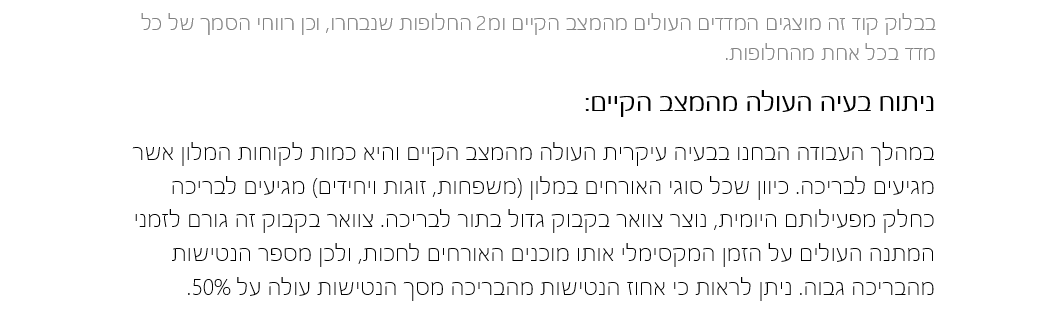

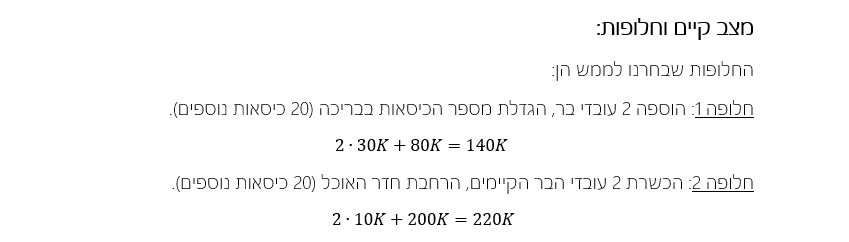

#Welsh Current State

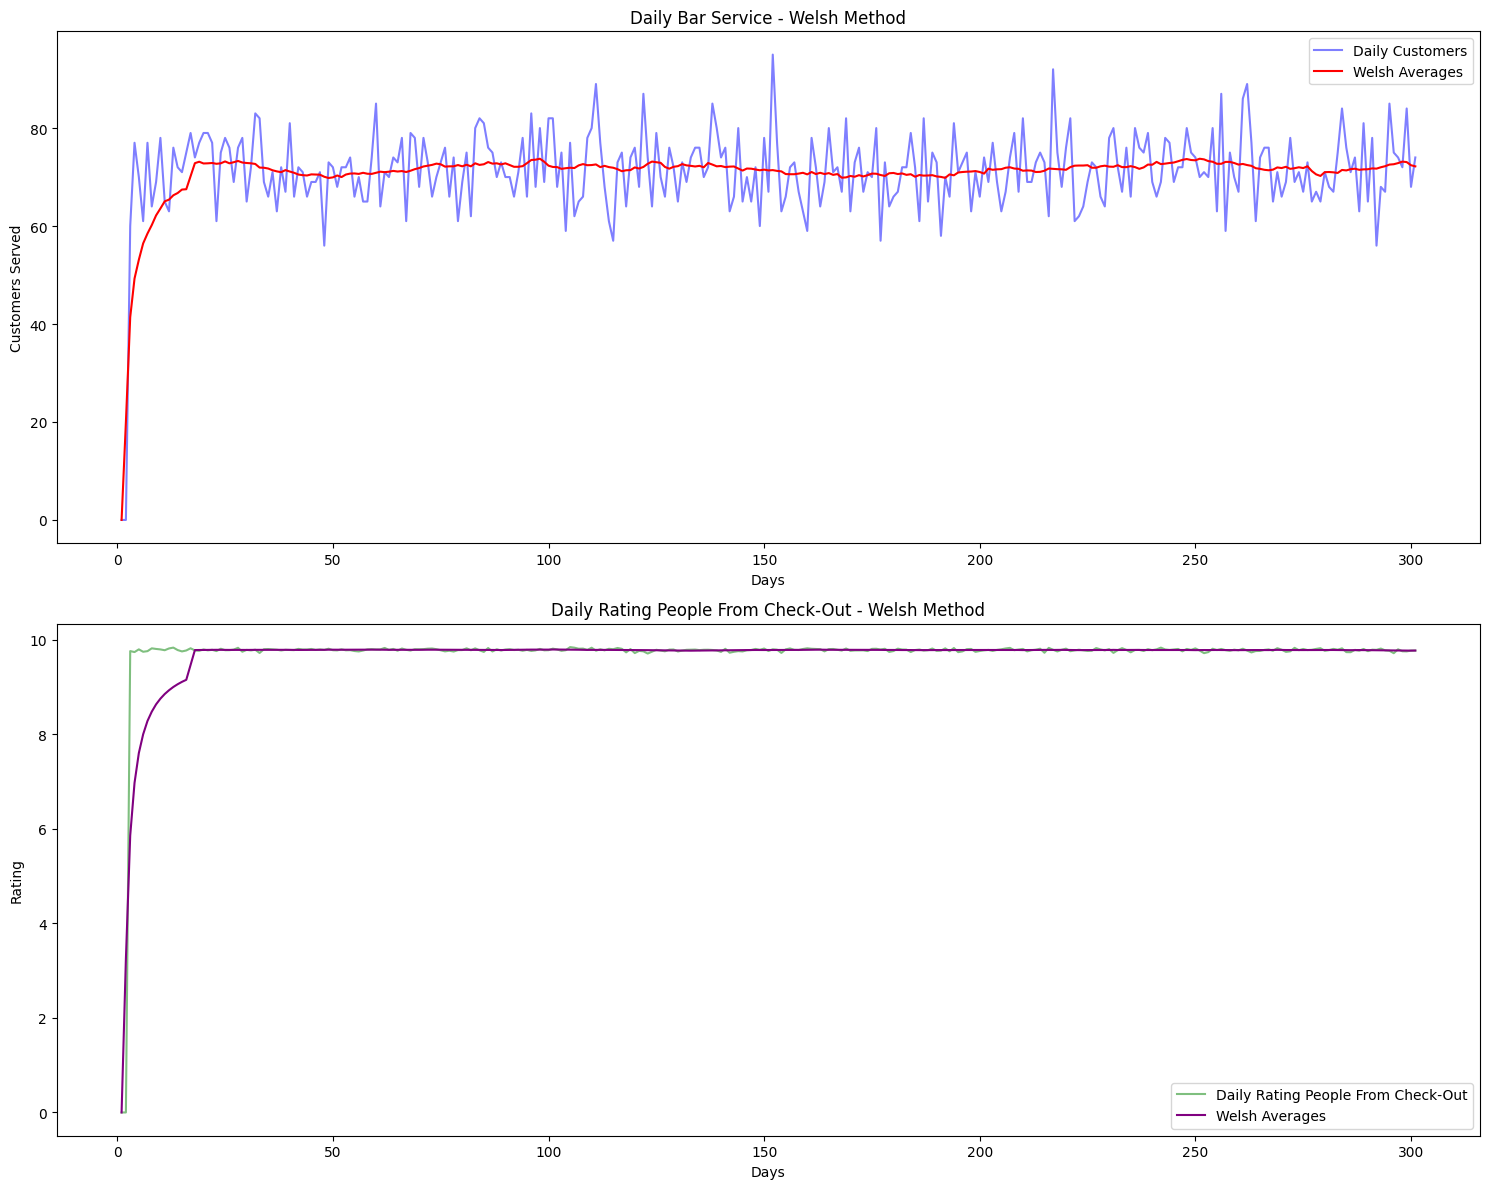

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

simulation = HotelSimulation(2, 5, 1.5, 50, 60, 300)
simulation.run() #current state

# Use the collected bar service and reneging people data
bar_data = simulation.bar_service_data
rating_data = simulation.daily_checkout_ratings

# Window size
w = 15

def welsh_method(data, w):
    n = len(data)
    welsh_averages = []

    for i in range(n):
        if i < w:
            # Case 1: Start of the series (dynamically growing window)
            start_idx = 0
            end_idx = i + i + 1  # Adjust to include all points for s = -(i-1) to s = (i-1)
            numerator = np.sum(data[start_idx:end_idx])
            denominator = 2 * (i + 1) - 1
        elif i < n - w:
            # Case 2: Fixed-size window
            start_idx = i - w
            end_idx = i + w + 1  # Adjust to include all points for s = -w to s = w
            numerator = np.sum(data[start_idx:end_idx])
            denominator = 2 * w + 1
        else:
            # Adjust denominator at the end of the array
            start_idx = max(0, i - w)
            end_idx = n  # Includes all remaining valid points
            numerator = np.sum(data[start_idx:end_idx])
            denominator = end_idx - start_idx  # Adjust to the actual number of points
        avg = numerator / denominator
        welsh_averages.append(avg)

    return welsh_averages

bar_welsh_avg = welsh_method(bar_data, w)
rating_welsh_avg = welsh_method(rating_data, w)

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Bar Service Plot
ax1.plot(range(1, len(bar_data) + 1), bar_data, label='Daily Customers', color='blue', alpha=0.5)
ax1.plot(range(1, len(bar_data) + 1), bar_welsh_avg, label='Welsh Averages', linestyle='-', color='red')
ax1.set_xlabel('Days')
ax1.set_ylabel('Customers Served')
ax1.set_title('Daily Bar Service - Welsh Method')
ax1.legend()

# Reneging People Plot
ax2.plot(range(1, len(rating_data) + 1), rating_data, label='Daily Rating People From Check-Out', color='green', alpha=0.5)
ax2.plot(range(1, len(rating_data) + 1), rating_welsh_avg, label='Welsh Averages', linestyle='-', color='purple')
ax2.set_xlabel('Days')
ax2.set_ylabel('Rating')
ax2.set_title('Daily Rating People From Check-Out - Welsh Method')
ax2.legend()

plt.tight_layout()
plt.show()

# Welsh Alternative 1

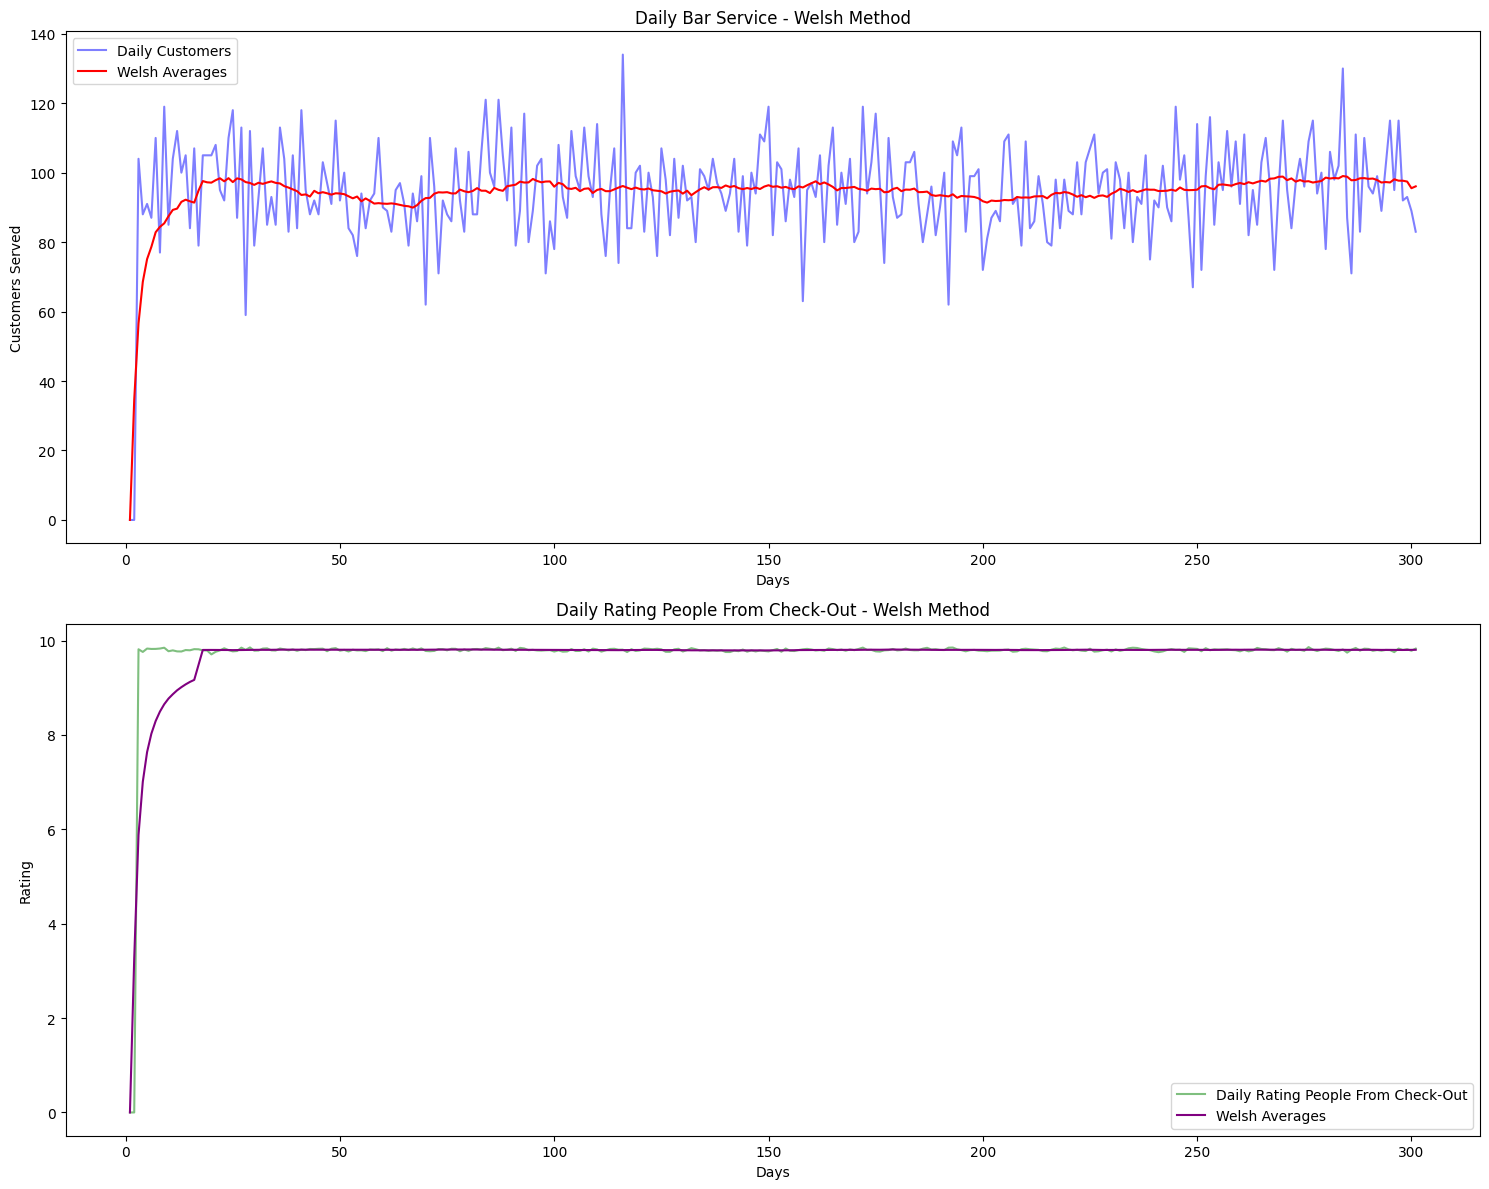

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

simulation = HotelSimulation(4, 5, 1.5, 70, 60, 300)
simulation.run() #current state

# Use the collected bar service and reneging people data
bar_data = simulation.bar_service_data
rating_data = simulation.daily_checkout_ratings

# Window size
w = 15

def welsh_method(data, w):
    n = len(data)
    welsh_averages = []

    for i in range(n):
        if i < w:
            # Case 1: Start of the series (dynamically growing window)
            start_idx = 0
            end_idx = i + i + 1  # Adjust to include all points for s = -(i-1) to s = (i-1)
            numerator = np.sum(data[start_idx:end_idx])
            denominator = 2 * (i + 1) - 1
        elif i < n - w:
            # Case 2: Fixed-size window
            start_idx = i - w
            end_idx = i + w + 1  # Adjust to include all points for s = -w to s = w
            numerator = np.sum(data[start_idx:end_idx])
            denominator = 2 * w + 1
        else:
            # Adjust denominator at the end of the array
            start_idx = max(0, i - w)
            end_idx = n  # Includes all remaining valid points
            numerator = np.sum(data[start_idx:end_idx])
            denominator = end_idx - start_idx  # Adjust to the actual number of points
        avg = numerator / denominator
        welsh_averages.append(avg)

    return welsh_averages

bar_welsh_avg = welsh_method(bar_data, w)
rating_welsh_avg = welsh_method(rating_data, w)

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Bar Service Plot
ax1.plot(range(1, len(bar_data) + 1), bar_data, label='Daily Customers', color='blue', alpha=0.5)
ax1.plot(range(1, len(bar_data) + 1), bar_welsh_avg, label='Welsh Averages', linestyle='-', color='red')
ax1.set_xlabel('Days')
ax1.set_ylabel('Customers Served')
ax1.set_title('Daily Bar Service - Welsh Method')
ax1.legend()

# Reneging People Plot
ax2.plot(range(1, len(rating_data) + 1), rating_data, label='Daily Rating People From Check-Out', color='green', alpha=0.5)
ax2.plot(range(1, len(rating_data) + 1), rating_welsh_avg, label='Welsh Averages', linestyle='-', color='purple')
ax2.set_xlabel('Days')
ax2.set_ylabel('Rating')
ax2.set_title('Daily Rating People From Check-Out - Welsh Method')
ax2.legend()

plt.tight_layout()
plt.show()

# Welsh Alternative 2

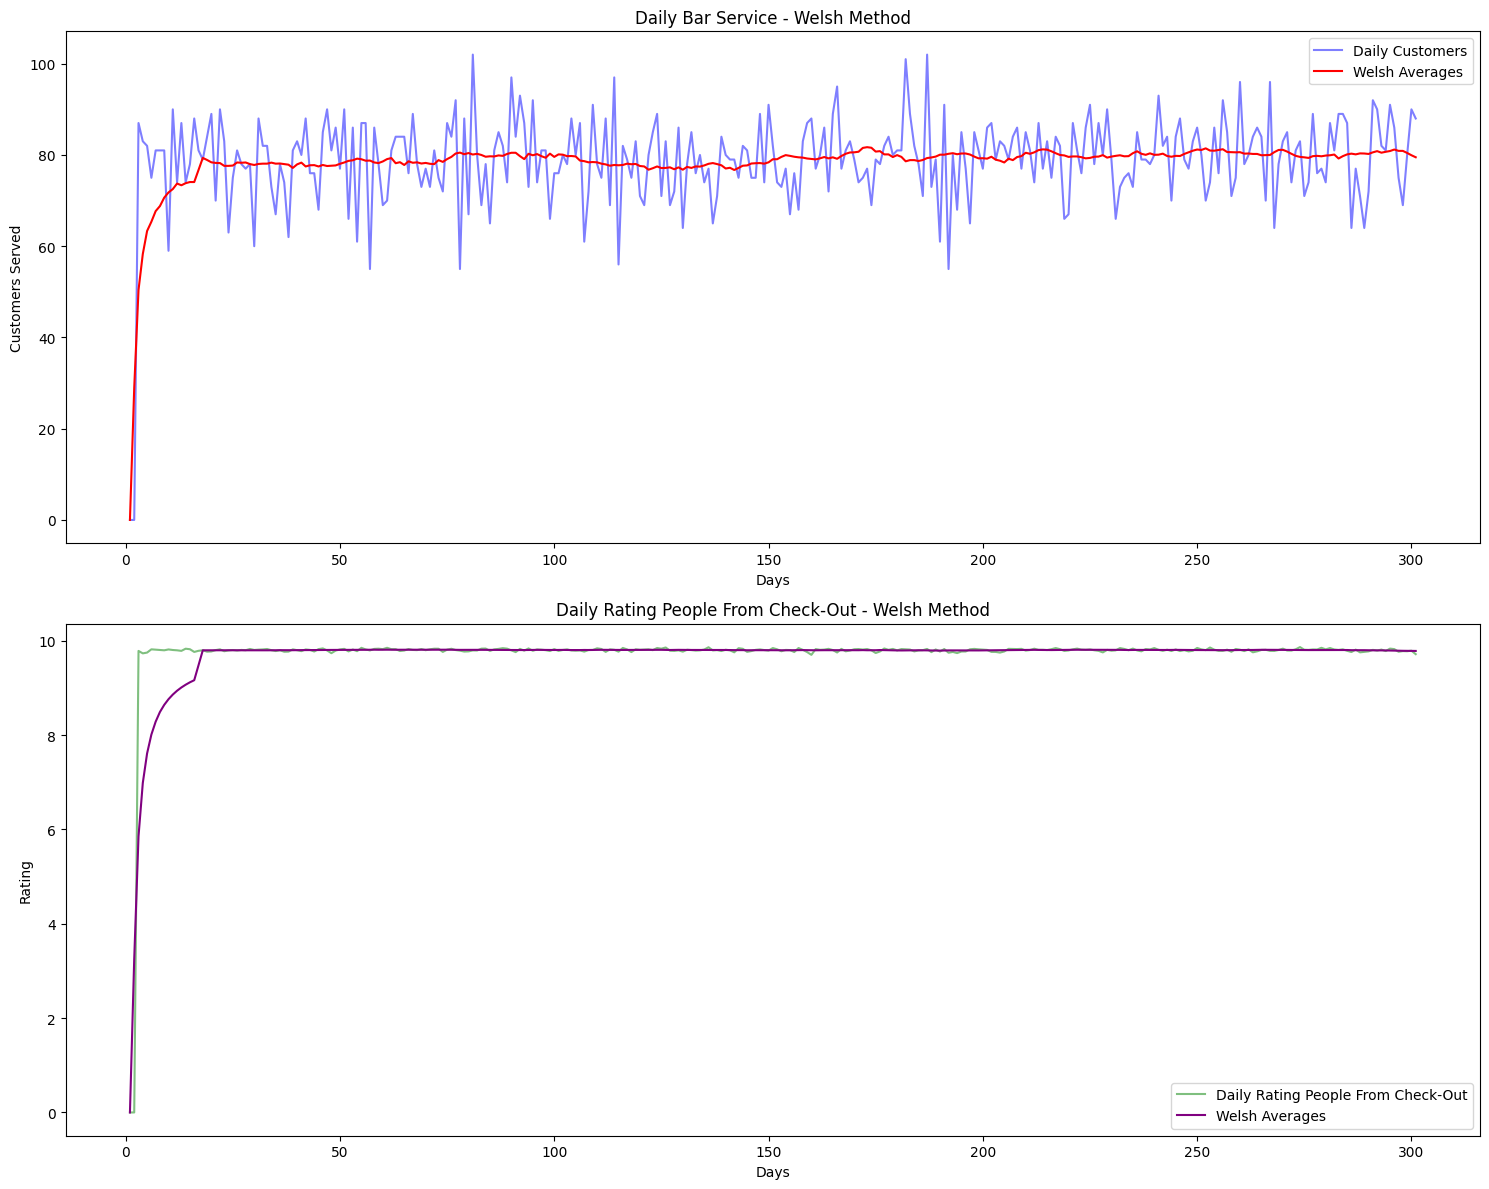

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

simulation = HotelSimulation(2, 4, 1, 50, 80, 300)
simulation.run() #current state

# Use the collected bar service and reneging people data
bar_data = simulation.bar_service_data
rating_data = simulation.daily_checkout_ratings

# Window size
w = 15

def welsh_method(data, w):
    n = len(data)
    welsh_averages = []

    for i in range(n):
        if i < w:
            # Case 1: Start of the series (dynamically growing window)
            start_idx = 0
            end_idx = i + i + 1  # Adjust to include all points for s = -(i-1) to s = (i-1)
            numerator = np.sum(data[start_idx:end_idx])
            denominator = 2 * (i + 1) - 1
        elif i < n - w:
            # Case 2: Fixed-size window
            start_idx = i - w
            end_idx = i + w + 1  # Adjust to include all points for s = -w to s = w
            numerator = np.sum(data[start_idx:end_idx])
            denominator = 2 * w + 1
        else:
            # Adjust denominator at the end of the array
            start_idx = max(0, i - w)
            end_idx = n  # Includes all remaining valid points
            numerator = np.sum(data[start_idx:end_idx])
            denominator = end_idx - start_idx  # Adjust to the actual number of points
        avg = numerator / denominator
        welsh_averages.append(avg)

    return welsh_averages

bar_welsh_avg = welsh_method(bar_data, w)
rating_welsh_avg = welsh_method(rating_data, w)

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Bar Service Plot
ax1.plot(range(1, len(bar_data) + 1), bar_data, label='Daily Customers', color='blue', alpha=0.5)
ax1.plot(range(1, len(bar_data) + 1), bar_welsh_avg, label='Welsh Averages', linestyle='-', color='red')
ax1.set_xlabel('Days')
ax1.set_ylabel('Customers Served')
ax1.set_title('Daily Bar Service - Welsh Method')
ax1.legend()

# Reneging People Plot
ax2.plot(range(1, len(rating_data) + 1), rating_data, label='Daily Rating People From Check-Out', color='green', alpha=0.5)
ax2.plot(range(1, len(rating_data) + 1), rating_welsh_avg, label='Welsh Averages', linestyle='-', color='purple')
ax2.set_xlabel('Days')
ax2.set_ylabel('Rating')
ax2.set_title('Daily Rating People From Check-Out - Welsh Method')
ax2.legend()

plt.tight_layout()
plt.show()

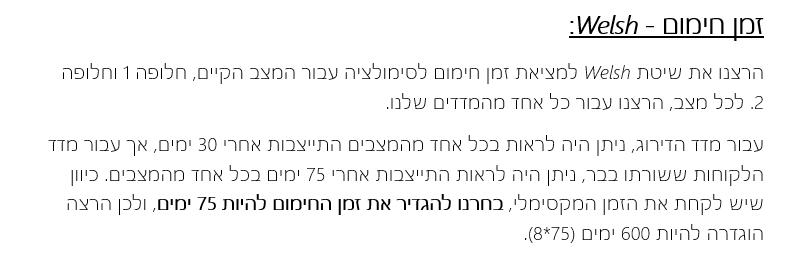

In [ ]:
delta = 0.1/(1+0.1)
ATotal = 0.1
Ai = ATotal/(2*3) #2 metrics, 3 Alternatives
t = 2.821 #(10-1, 1-Ai/2)=t(9,0.991)
n = 10


total_barServed = 0
total_rating = 0
total_days = 0
barServedCurrent = []
ratingCurrent=[]

for i in range(n):
  barServedRun=[]
  ratingRun=[]
  random.seed(50+i)
  simulation = HotelSimulation(2, 5, 1.5, 50, 60, 75*8)
  simulation.run() #current state
  barServedRun.extend(simulation.bar_service_data[75:])
  ratingRun.extend(simulation.daily_checkout_ratings[75:])

  total_barServed += sum(barServedRun)
  total_rating += sum(ratingRun)
  total_days = 75*7

  # Calculate averages
  avg_barServed = total_barServed / total_days
  barServedCurrent.append(avg_barServed)
  avg_rating = total_rating / total_days
  ratingCurrent.append(avg_rating)
  total_barServed = 0
  total_rating = 0


print("Bar served Current:")
for i, value in enumerate(barServedCurrent, 1):
    print(f"Run {i}: {value:.2f}")

print("\nRating Current:")
for i, value in enumerate(ratingCurrent, 1):
    print(f"Run {i}: {value:.2f}")

# For Current State
barServed_current_avg = np.mean(barServedCurrent)
barServed_current_std = np.std(barServedCurrent)
rating_current_avg = np.mean(ratingCurrent)
rating_current_std = np.std(ratingCurrent)

print("\nCurrent State Summary:")
print(f"Bar Served - Average: {barServed_current_avg:.2f}, Standard Deviation: {barServed_current_std:.2f}")
print(f"Rating - Average: {rating_current_avg:.2f}, Standard Deviation: {rating_current_std:.2f}")

resCurrBar = (t*(barServed_current_std)/math.sqrt(n))/barServed_current_avg
if resCurrBar < delta: #enough samples
  print("Enough Samples For Bar Served Metrix :)")
else:
  N = n*((t*(barServed_current_std)/math.sqrt(n))/(barServed_current_avg*delta))**2
  N = math.ceil(N) #round up
  print(f'Not enough samples. You need to add {N-n} samples for the bar served metrix.')

resCurrRate = (t*(rating_current_std)/math.sqrt(n))/rating_current_avg
if resCurrRate < delta: #enough samples
  print("Enough Samples For Rating Metrix :)")
else:
  N = n*((t*(rating_current_std)/math.sqrt(n))/(rating_current_avg*delta))**2
  N = math.ceil(N)
  print(f'Not enough samples. You need to add {N-n} samples for the rating metrix.')

print("--------------------------------------------------------------")

total_barServed = 0
total_rating = 0
total_days = 0
barServedOptn1 = []
ratingOptn1=[]

for i in range(n):
  barServedRun=[]
  ratingRun=[]
  random.seed(10+i)
  simulation = HotelSimulation(4, 5, 1.5, 70, 60, 75*8)
  simulation.run() #Alternative 1
  barServedRun.extend(simulation.bar_service_data[75:])
  ratingRun.extend(simulation.daily_checkout_ratings[75:])

  total_barServed += sum(barServedRun)
  total_rating += sum(ratingRun)
  total_days = 75*7

  # Calculate averages
  avg_barServed = total_barServed / total_days
  barServedOptn1.append(avg_barServed)
  avg_rating = total_rating / total_days
  ratingOptn1.append(avg_rating)
  total_barServed = 0
  total_rating = 0

print("Bar served Alternative 1:")
for i, value in enumerate(barServedOptn1, 1):
    print(f"Run {i}: {value:.2f}")

print("\nRating Alternative 1:")
for i, value in enumerate(ratingOptn1, 1):
    print(f"Run {i}: {value:.2f}")

# For Alternative 1
barServed_optn1_avg = np.mean(barServedOptn1)
barServed_optn1_std = np.std(barServedOptn1)
rating_optn1_avg = np.mean(ratingOptn1)
rating_optn1_std = np.std(ratingOptn1)

print("\nAlternative 1 Summary:")
print(f"Bar Served - Average: {barServed_optn1_avg:.2f}, Standard Deviation: {barServed_optn1_std:.2f}")
print(f"Rating - Average: {rating_optn1_avg:.2f}, Standard Deviation: {rating_optn1_std:.2f}")

resOptn1Bar = (t*(barServed_optn1_std)/math.sqrt(n))/barServed_optn1_avg
if resOptn1Bar < delta: #enough samples
  print("Enough Samples For Bar Served Metrix :)")
else:
  N = n*((t*(barServed_optn1_std)/math.sqrt(n))/(barServed_optn1_avg*delta))**2
  N = math.ceil(N)
  print(f'Not enough samples. You need to add {N-n} samples for the bar served metrix.')

resOptn1Rate = (t*(rating_optn1_std)/math.sqrt(n))/rating_optn1_avg
if resOptn1Rate < delta: #enough samples
  print("Enough Samples For Rating Metrix :)")
else:
  N = n*((t*(rating_optn1_std)/math.sqrt(n))/(rating_optn1_avg*delta))**2
  N = math.ceil(N)
  print(f'Not enough samples. You need to add {N-n} samples for the rating metrix.')


print("--------------------------------------------------------------")

total_barServed = 0
total_rating = 0
total_days = 0
barServedOptn2 = []
ratingOptn2=[]

for i in range(n):
  barServedRun=[]
  ratingRun=[]
  random.seed(75+i)
  simulation = HotelSimulation(2, 4, 1, 50, 80, 75*8)
  simulation.run() #Alternative 2
  barServedRun.extend(simulation.bar_service_data[75:])
  ratingRun.extend(simulation.daily_checkout_ratings[75:])

  total_barServed += sum(barServedRun)
  total_rating += sum(ratingRun)
  total_days = 75*7

  # Calculate averages
  avg_barServed = total_barServed / total_days
  barServedOptn2.append(avg_barServed)
  avg_rating = total_rating / total_days
  ratingOptn2.append(avg_rating)
  total_barServed = 0
  total_rating = 0

print("Bar served Alternative 2:")
for i, value in enumerate(barServedOptn2, 1):
    print(f"Run {i}: {value:.2f}")

print("\nRating Alternative 2:")
for i, value in enumerate(ratingOptn2, 1):
    print(f"Run {i}: {value:.2f}")

# For Alternative 2
barServed_optn2_avg = np.mean(barServedOptn2)
barServed_optn2_std = np.std(barServedOptn2)
rating_optn2_avg = np.mean(ratingOptn2)
rating_optn2_std = np.std(ratingOptn2)

print("\nAlternative 2 Summary:")
print(f"Bar Served - Average: {barServed_optn2_avg:.2f}, Standard Deviation: {barServed_optn2_std:.2f}")
print(f"Rating - Average: {rating_optn2_avg:.2f}, Standard Deviation: {rating_optn2_std:.2f}")

resOptn2Bar = (t*(barServed_optn2_std)/math.sqrt(n))/barServed_optn2_avg
if resOptn2Bar < delta: #enough samples
  print("Enough Samples For Bar Served Metrix :)")
else:
  N = n*((t*(barServed_optn2_std)/math.sqrt(n))/(barServed_optn2_avg*delta))**2
  N = math.ceil(N)
  print(f'Not enough samples. You need to add {N-n} samples for the bar served metrix.')

resOptn2Rate = (t*(rating_optn2_std)/math.sqrt(n))/rating_optn2_avg
if resOptn2Rate < delta: #enough samples
  print("Enough Samples For Rating Metrix :)")
else:
  N = n*((t*(rating_optn2_std)/math.sqrt(n))/(rating_optn2_avg*delta))**2
  N = math.ceil(N)
  print(f'Not enough samples. You need to add {N-n} samples for the rating metrix.')



Bar served Current:
Run 1: 71.34
Run 2: 72.24
Run 3: 71.49
Run 4: 71.44
Run 5: 70.60
Run 6: 71.21
Run 7: 71.78
Run 8: 71.76
Run 9: 71.21
Run 10: 71.73

Rating Current:
Run 1: 9.81
Run 2: 9.80
Run 3: 9.80
Run 4: 9.80
Run 5: 9.79
Run 6: 9.80
Run 7: 9.80
Run 8: 9.80
Run 9: 9.80
Run 10: 9.80

Current State Summary:
Bar Served - Average: 71.48, Standard Deviation: 0.42
Rating - Average: 9.80, Standard Deviation: 0.00
Enough Samples For Bar Served Metrix :)
Enough Samples For Rating Metrix :)
--------------------------------------------------------------
Bar served Alternative 1:
Run 1: 95.88
Run 2: 95.27
Run 3: 95.49
Run 4: 95.09
Run 5: 95.79
Run 6: 96.08
Run 7: 94.87
Run 8: 95.88
Run 9: 95.18
Run 10: 94.51

Rating Alternative 1:
Run 1: 9.82
Run 2: 9.82
Run 3: 9.82
Run 4: 9.82
Run 5: 9.82
Run 6: 9.82
Run 7: 9.82
Run 8: 9.82
Run 9: 9.82
Run 10: 9.82

Alternative 1 Summary:
Bar Served - Average: 95.40, Standard Deviation: 0.48
Rating - Average: 9.82, Standard Deviation: 0.00
Enough Samples Fo

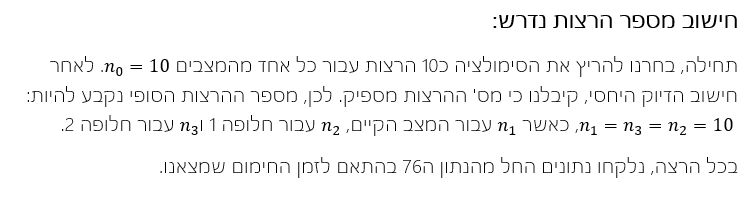

In [ ]:
import numpy as np
from scipy import stats

# Data for the three alternatives considering ratio measurment- so normality can be assumed
n1 = n
meanCurr_bar = barServed_current_avg
varianceCurr_bar = barServed_current_std**2  # Standard Deviation squared
meanCurr_rating = rating_current_avg
varianceCurr_rating = rating_current_std**2  # Standard Deviation squared

n2 = n
meanOptn1_bar = barServed_optn1_avg
varianceOptn1_bar = barServed_optn1_std**2  # Standard Deviation squared
meanOptn1_rating = rating_optn1_avg
varianceOptn1_rating = rating_optn1_std**2  # Standard Deviation squared

n3 = n
meanOptn2_bar = barServed_optn2_avg
varianceOptn2_bar = barServed_optn2_std**2  # Standard Deviation squared
meanOptn2_rating = rating_optn2_avg
varianceOptn2_rating = rating_optn2_std**2  # Standard Deviation squared

# Pairwise differences
pairs = [
    ('BAR - Current State vs Alternative 1', meanCurr_bar - meanOptn1_bar, varianceCurr_bar, n1, varianceOptn1_bar, n2),
    ('RATING - Current State vs Alternative 1', meanCurr_rating - meanOptn1_rating, varianceCurr_rating, n1, varianceOptn1_rating, n2),
    ('BAR - Current State vs Alternative 2', meanCurr_bar - meanOptn2_bar, varianceCurr_bar, n1, varianceOptn2_bar, n3),
    ('RATING - Current State vs Alternative 2', meanCurr_rating - meanOptn2_rating, varianceCurr_rating, n1, varianceOptn2_rating, n3),
    ('BAR - Alternative 1 vs Alternative 2', meanOptn1_bar - meanOptn2_bar, varianceOptn1_bar, n2, varianceOptn2_bar, n3),
    ('RATING - Alternative 1 vs Alternative 2', meanOptn1_rating - meanOptn2_rating, varianceOptn1_rating, n2, varianceOptn2_rating, n3)
]

# Bonferroni correction
alpha = 0.1
adjusted_alpha = alpha / 6 # 2 metrics * 3 alternatives

# Calculate and print confidence intervals for each pair
for name, mean_diff, var1, n1, var2, n2 in pairs:

    # Calculate the standard error of the difference
    standard_error = np.sqrt((var1 / n1) + (var2 / n2))

    # Degrees of freedom
    numerator = (var1/n1 + var2/n2)**2
    denominator = ( (var1**2) / ((n1**2) * (n1 - 1)) ) + ( (var2**2) / ((n2**2) * (n2 - 1)) )
    degrees_of_freedom = int(numerator / denominator)

    # Critical t-value using adjusted alpha
    t_crit = stats.t.ppf(1 - adjusted_alpha/2, degrees_of_freedom)

    # Confidence interval
    margin_of_error = t_crit * standard_error
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error

    # Output results
    print(f"{name}:")
    print("  Difference in means:", mean_diff)
    print("  Degrees of Freedom (approx):", degrees_of_freedom)
    print("  Critical t-value:", t_crit)
    print("  Confidence Interval: ({:.4f}, {:.4f})".format(ci_lower, ci_upper))

    # Interpretation
    if ci_upper < 0:
        print("  Preferred Alternative: The second in the pair (negative difference).")
    elif ci_lower > 0:
        print("  Preferred Alternative: The first in the pair (positive difference).")
    else:
        print("  No significant difference between the alternatives.")
    print()

BAR - Current State vs Alternative 1:
  Difference in means: -23.92323809523809
  Degrees of Freedom (approx): 17
  Critical t-value: 2.6549955835459778
  Confidence Interval: (-24.4593, -23.3872)
  Preferred Alternative: The second in the pair (negative difference).

RATING - Current State vs Alternative 1:
  Difference in means: -0.017608533506910717
  Degrees of Freedom (approx): 10
  Critical t-value: 2.87007255565898
  Confidence Interval: (-0.0222, -0.0130)
  Preferred Alternative: The second in the pair (negative difference).

BAR - Current State vs Alternative 2:
  Difference in means: -7.651809523809533
  Degrees of Freedom (approx): 16
  Critical t-value: 2.673032286426951
  Confidence Interval: (-8.0932, -7.2104)
  Preferred Alternative: The second in the pair (negative difference).

RATING - Current State vs Alternative 2:
  Difference in means: -0.021659334112236195
  Degrees of Freedom (approx): 10
  Critical t-value: 2.87007255565898
  Confidence Interval: (-0.0262, -0.0

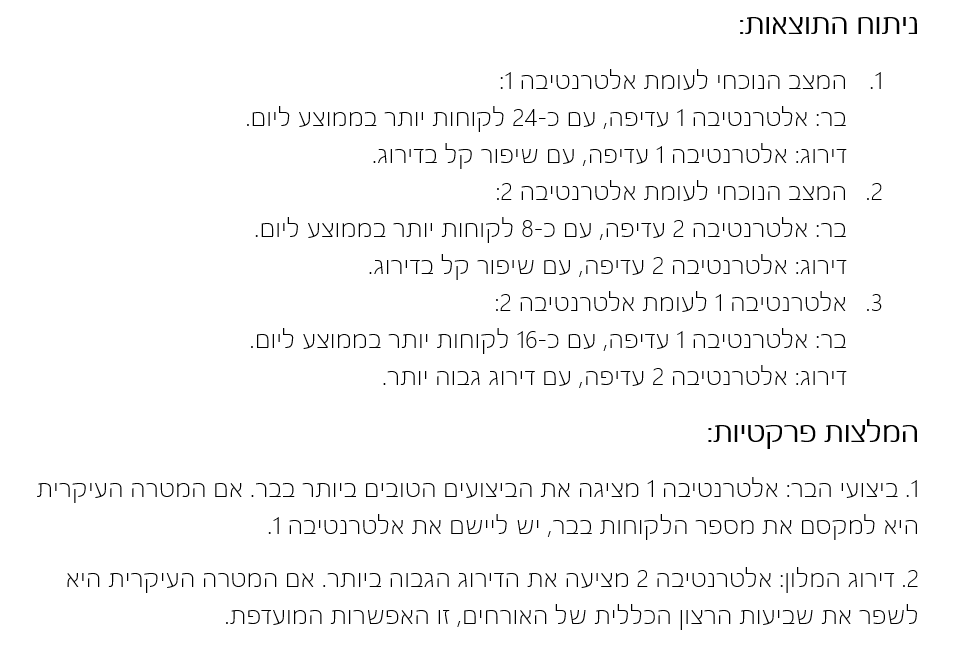

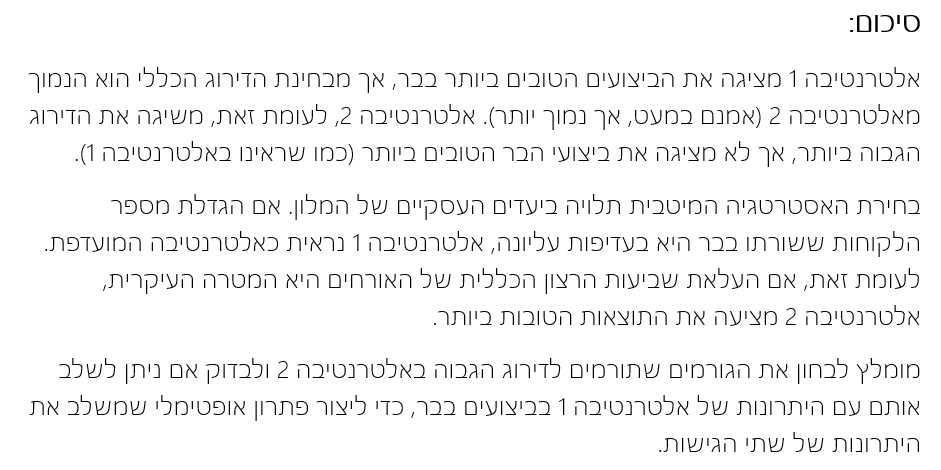